In [277]:
# import libraries
import numpy as np
import pandas as pd
from scipy import stats

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

# Get the data

In [278]:
train_data_file = "C:/Users/Stille/Desktop/ML projects/zhengqi_train.txt"
test_data_file =  "C:/Users/Stille/Desktop/ML projects/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep = '\t', encoding = 'utf-8')
test_data = pd.read_csv(test_data_file, sep = '\t', encoding = 'utf-8')

# Explore the data

In [279]:
# get the summary of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

There are 2888 samples in the training set, 38 feature variables from V0 to V37. The dtypes of all feature variables are float64. None of them has null values.

In [280]:
# get the summary of test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

There are 1925 samples in the test set.

In [281]:
# generate descriptive statistics
train_data.describe()

V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.123048     0.056068     0.289720    -0.067790     0.012921   
std       0.928031     0.941515     0.911236     0.970298     0.888377   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.297000    -0.226250    -0.313000    -0.652250    -0.385000   
50%       0.359000     0.272500     0.386000    -0.044500     0.110000   
75%       0.726000     0.599000     0.918250     0.624000     0.550250   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8           V9  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean     -0.558565     0.182892     0.116155     0.177856    -0.169452  ...   
std       0.517957     0.918054     0.955116     0.895444     0.953813  ...   
min      -2.182000    -4.576000    -5.048000    -4.692000   -12.891000  ...   
25%      -0.853000    -0.310000    -0.295000    -0.159000    -0.390000  ...   
50%      -0.466000     0.388000     0.344000     0.362000     0.042000  ...   
75%      -0.154000     0.831250     0.782250     0.726000     0.042000  ...   
max       0.489000     1.895000     1.918000     2.245000     1.335000  ...   

               V29          V30          V31          V32          V33  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.097648     0.055477     0.127791     0.020806     0.007801   
std       1.061200     0.901934     0.873028     0.902584     1.006995   
min      -2.912000    -4.507000    -5.859000    -4.053000    -4.627000   
25%      -0.664000    -0.283000    -0.170250    -0.407250    -0.499000   
50%      -0.023000     0.053500     0.299500     0.039000    -0.040000   
75%       0.745250     0.488000     0.635000     0.557000     0.462000   
max       4.580000     2.689000     2.013000     2.395000     5.465000   

               V34          V35          V36          V37       target  
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  
mean      0.006715     0.197764     0.030658    -0.130330     0.126353  
std       1.003291     0.985675     0.970812     1.017196     0.983966  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.202500    -0.413000    -0.798250    -0.350250  
50%       0.160000     0.364000     0.137000    -0.185500     0.313000  
75%       0.273000     0.602000     0.644250     0.495250     0.793250  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

In [282]:
# generate descriptive statistics
test_data.describe()

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.184404    -0.083912    -0.434762     0.101671    -0.019172   
std       1.073333     1.076670     0.969541     1.034925     1.147286   
min      -4.814000    -5.488000    -4.283000    -3.276000    -4.921000   
25%      -0.664000    -0.451000    -0.978000    -0.644000    -0.497000   
50%       0.065000     0.195000    -0.267000     0.220000     0.118000   
75%       0.549000     0.589000     0.278000     0.793000     0.610000   
max       2.100000     2.120000     1.946000     2.603000     4.475000   

                V5           V6           V7           V8           V9  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.838049    -0.274092    -0.173971    -0.266709     0.255114  ...   
std       0.963043     1.054119     1.040101     1.085916     1.014394  ...   
min      -1.168000    -5.649000    -5.625000    -6.059000    -6.784000  ...   
25%       0.122000    -0.732000    -0.509000    -0.775000    -0.390000  ...   
50%       0.437000    -0.082000     0.018000    -0.004000     0.401000  ...   
75%       1.928000     0.457000     0.515000     0.482000     0.904000  ...   
max       3.176000     1.528000     1.394000     2.408000     1.766000  ...   

               V28          V29          V30          V31          V32  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean     -0.206871    -0.146463    -0.083215    -0.191729    -0.030782   
std       1.064140     0.880593     1.126414     1.138454     1.130228   
min      -2.435000    -2.413000    -4.507000    -7.698000    -4.057000   
25%      -0.453000    -0.818000    -0.339000    -0.476000    -0.472000   
50%      -0.445000    -0.199000     0.010000     0.100000     0.155000   
75%      -0.434000     0.468000     0.447000     0.471000     0.627000   
max       4.656000     3.022000     3.139000     1.428000     2.299000   

               V33          V34          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean     -0.011433    -0.009985    -0.296895    -0.046270     0.195735  
std       0.989732     0.995213     0.946896     1.040854     0.940599  
min      -4.627000    -4.789000    -7.477000    -2.608000    -3.346000  
25%      -0.460000    -0.290000    -0.349000    -0.593000    -0.432000  
50%      -0.040000     0.160000    -0.270000     0.083000     0.152000  
75%       0.419000     0.273000     0.364000     0.651000     0.797000  
max       5.465000     5.110000     1.671000     2.861000     3.021000  

[8 rows x 38 columns]

In [283]:
train_data.head(10)

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   
5  0.445  0.627  0.408  0.220  0.458 -1.056 -1.009 -1.896  0.481 -2.114  ...   
6  0.889  0.416  0.640  0.356  0.224 -0.893 -0.812 -1.823  0.729 -2.114  ...   
7  0.984  0.529  0.704  0.438  0.258 -0.917 -0.682 -1.721  0.753 -2.114  ...   
8  0.948  0.850  0.584  0.459  0.591 -0.523 -0.591 -1.524  0.763 -2.114  ...   
9  1.157  1.055  0.638  0.617  1.483 -0.731 -0.612 -1.524  0.968 -2.114  ...   

     V29    V30    V31    V32    V33    V34    V35    V36    V37  target  
0  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   0.175  
1 -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   0.676  
2 -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   0.633  
3  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   0.206  
4  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   0.384  
5  0.454  0.674  0.358  0.618 -0.843 -0.290  0.364 -0.191 -0.883   0.060  
6  0.454  0.081  0.243  0.468 -0.843 -0.290  0.364 -0.155 -1.318   0.415  
7  0.139 -0.050  0.428 -0.119 -0.843 -0.290  0.364  0.100 -0.899   0.609  
8  0.188  0.467  0.597 -0.057 -0.843 -0.290  0.364  0.053 -0.553   0.981  
9  0.860  0.456  0.916  0.039 -0.843 -0.290  0.364  0.151 -1.157   0.818  

[10 rows x 39 columns]

In [284]:
test_data.head(10)

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904  ...   
1  0.148  0.489 -0.247 -0.049  0.122 -0.201  0.487  0.493 -0.127  0.904  ...   
2 -0.166 -0.062 -0.311  0.046 -0.055  0.063  0.485  0.493 -0.227  0.904  ...   
3  0.102  0.294 -0.259  0.051 -0.183  0.148  0.474  0.504  0.010  0.904  ...   
4  0.300  0.428  0.208  0.051 -0.033  0.116  0.408  0.497  0.155  0.904  ...   
5  0.050  0.340  0.108  0.051 -0.348  0.074  0.516  0.491  0.238  0.904  ...   
6 -0.223  0.175 -0.390  0.051  0.006  0.134  0.497  0.548 -0.099  0.904  ...   
7 -0.126  0.152  0.227  0.021 -0.619 -0.069  0.520  0.548  0.060  0.904  ...   
8 -0.203 -0.014  0.010 -0.034 -0.322  0.105  0.453  0.518 -0.032  0.473  ...   
9 -0.181  0.797  0.470 -0.107 -0.477  0.184  0.588  0.528  0.319  0.904  ...   

     V28    V29    V30    V31    V32    V33    V34    V35    V36    V37  
0 -0.449  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388  
1 -0.443  0.047  0.560  0.176  0.551  0.046 -0.220  0.008 -0.294  0.104  
2 -0.458 -0.398  0.101  0.199  0.634  0.017 -0.234  0.008  0.373  0.569  
3 -0.456 -0.398  1.007  0.137  1.042 -0.040 -0.290  0.008 -0.666  0.391  
4 -0.458 -0.776  0.291  0.370  0.181 -0.040 -0.290  0.008 -0.140 -0.497  
5 -0.450 -0.897  0.536  0.447  0.370 -0.040 -0.290  0.008 -0.228  0.169  
6 -0.452 -0.937  0.249  0.432  0.494 -0.040 -0.290  0.008  0.104  1.077  
7 -0.452 -0.950  1.256  0.281  0.555 -0.040 -0.290  0.008 -0.700 -0.498  
8 -0.450 -0.950  0.078  0.222  0.245 -0.040 -0.290  0.008 -0.236 -0.149  
9 -0.446 -1.092 -0.131  0.466  0.430 -0.040 -0.290 -0.289 -0.431 -0.271  

[10 rows x 38 columns]

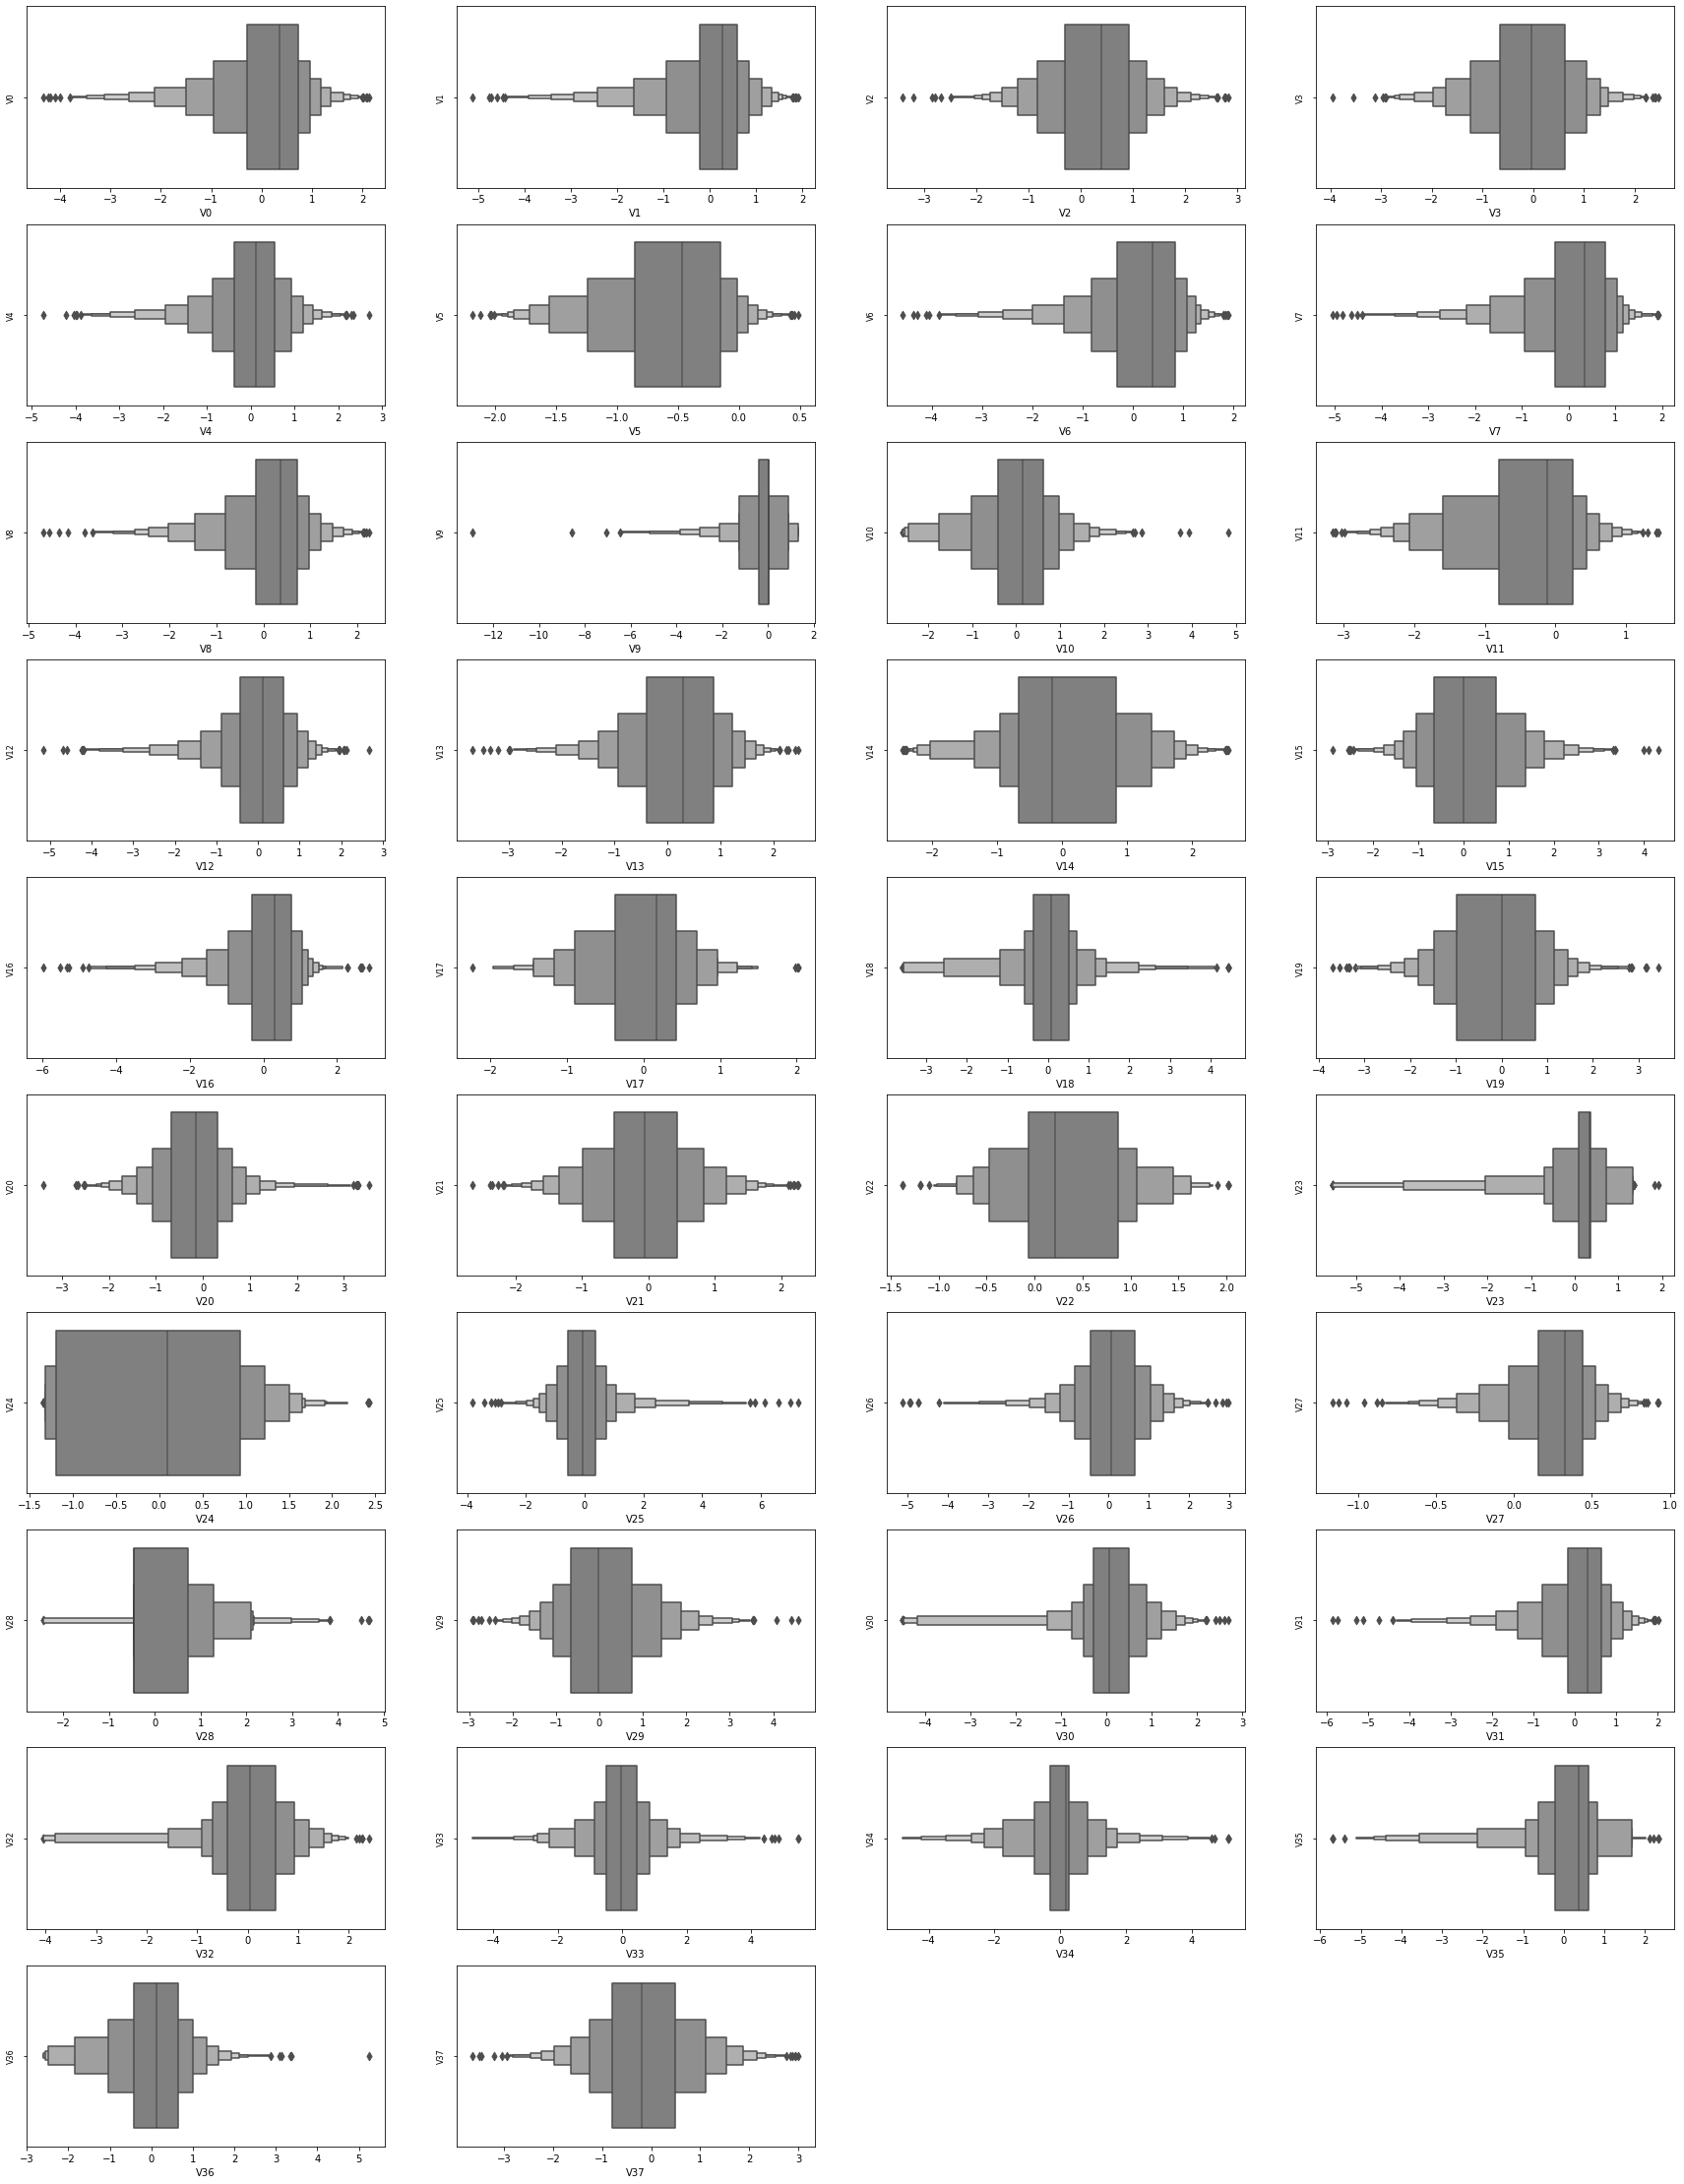

In [285]:
# Draw boxenplot to explore the feature variable
column = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(30, 40))
for i in range(38):
    plt.subplot(10, 4, i + 1)
    sns.boxenplot(train_data[column[i]], color = "gray")
    plt.ylabel(column[i], fontsize=8)
plt.show()

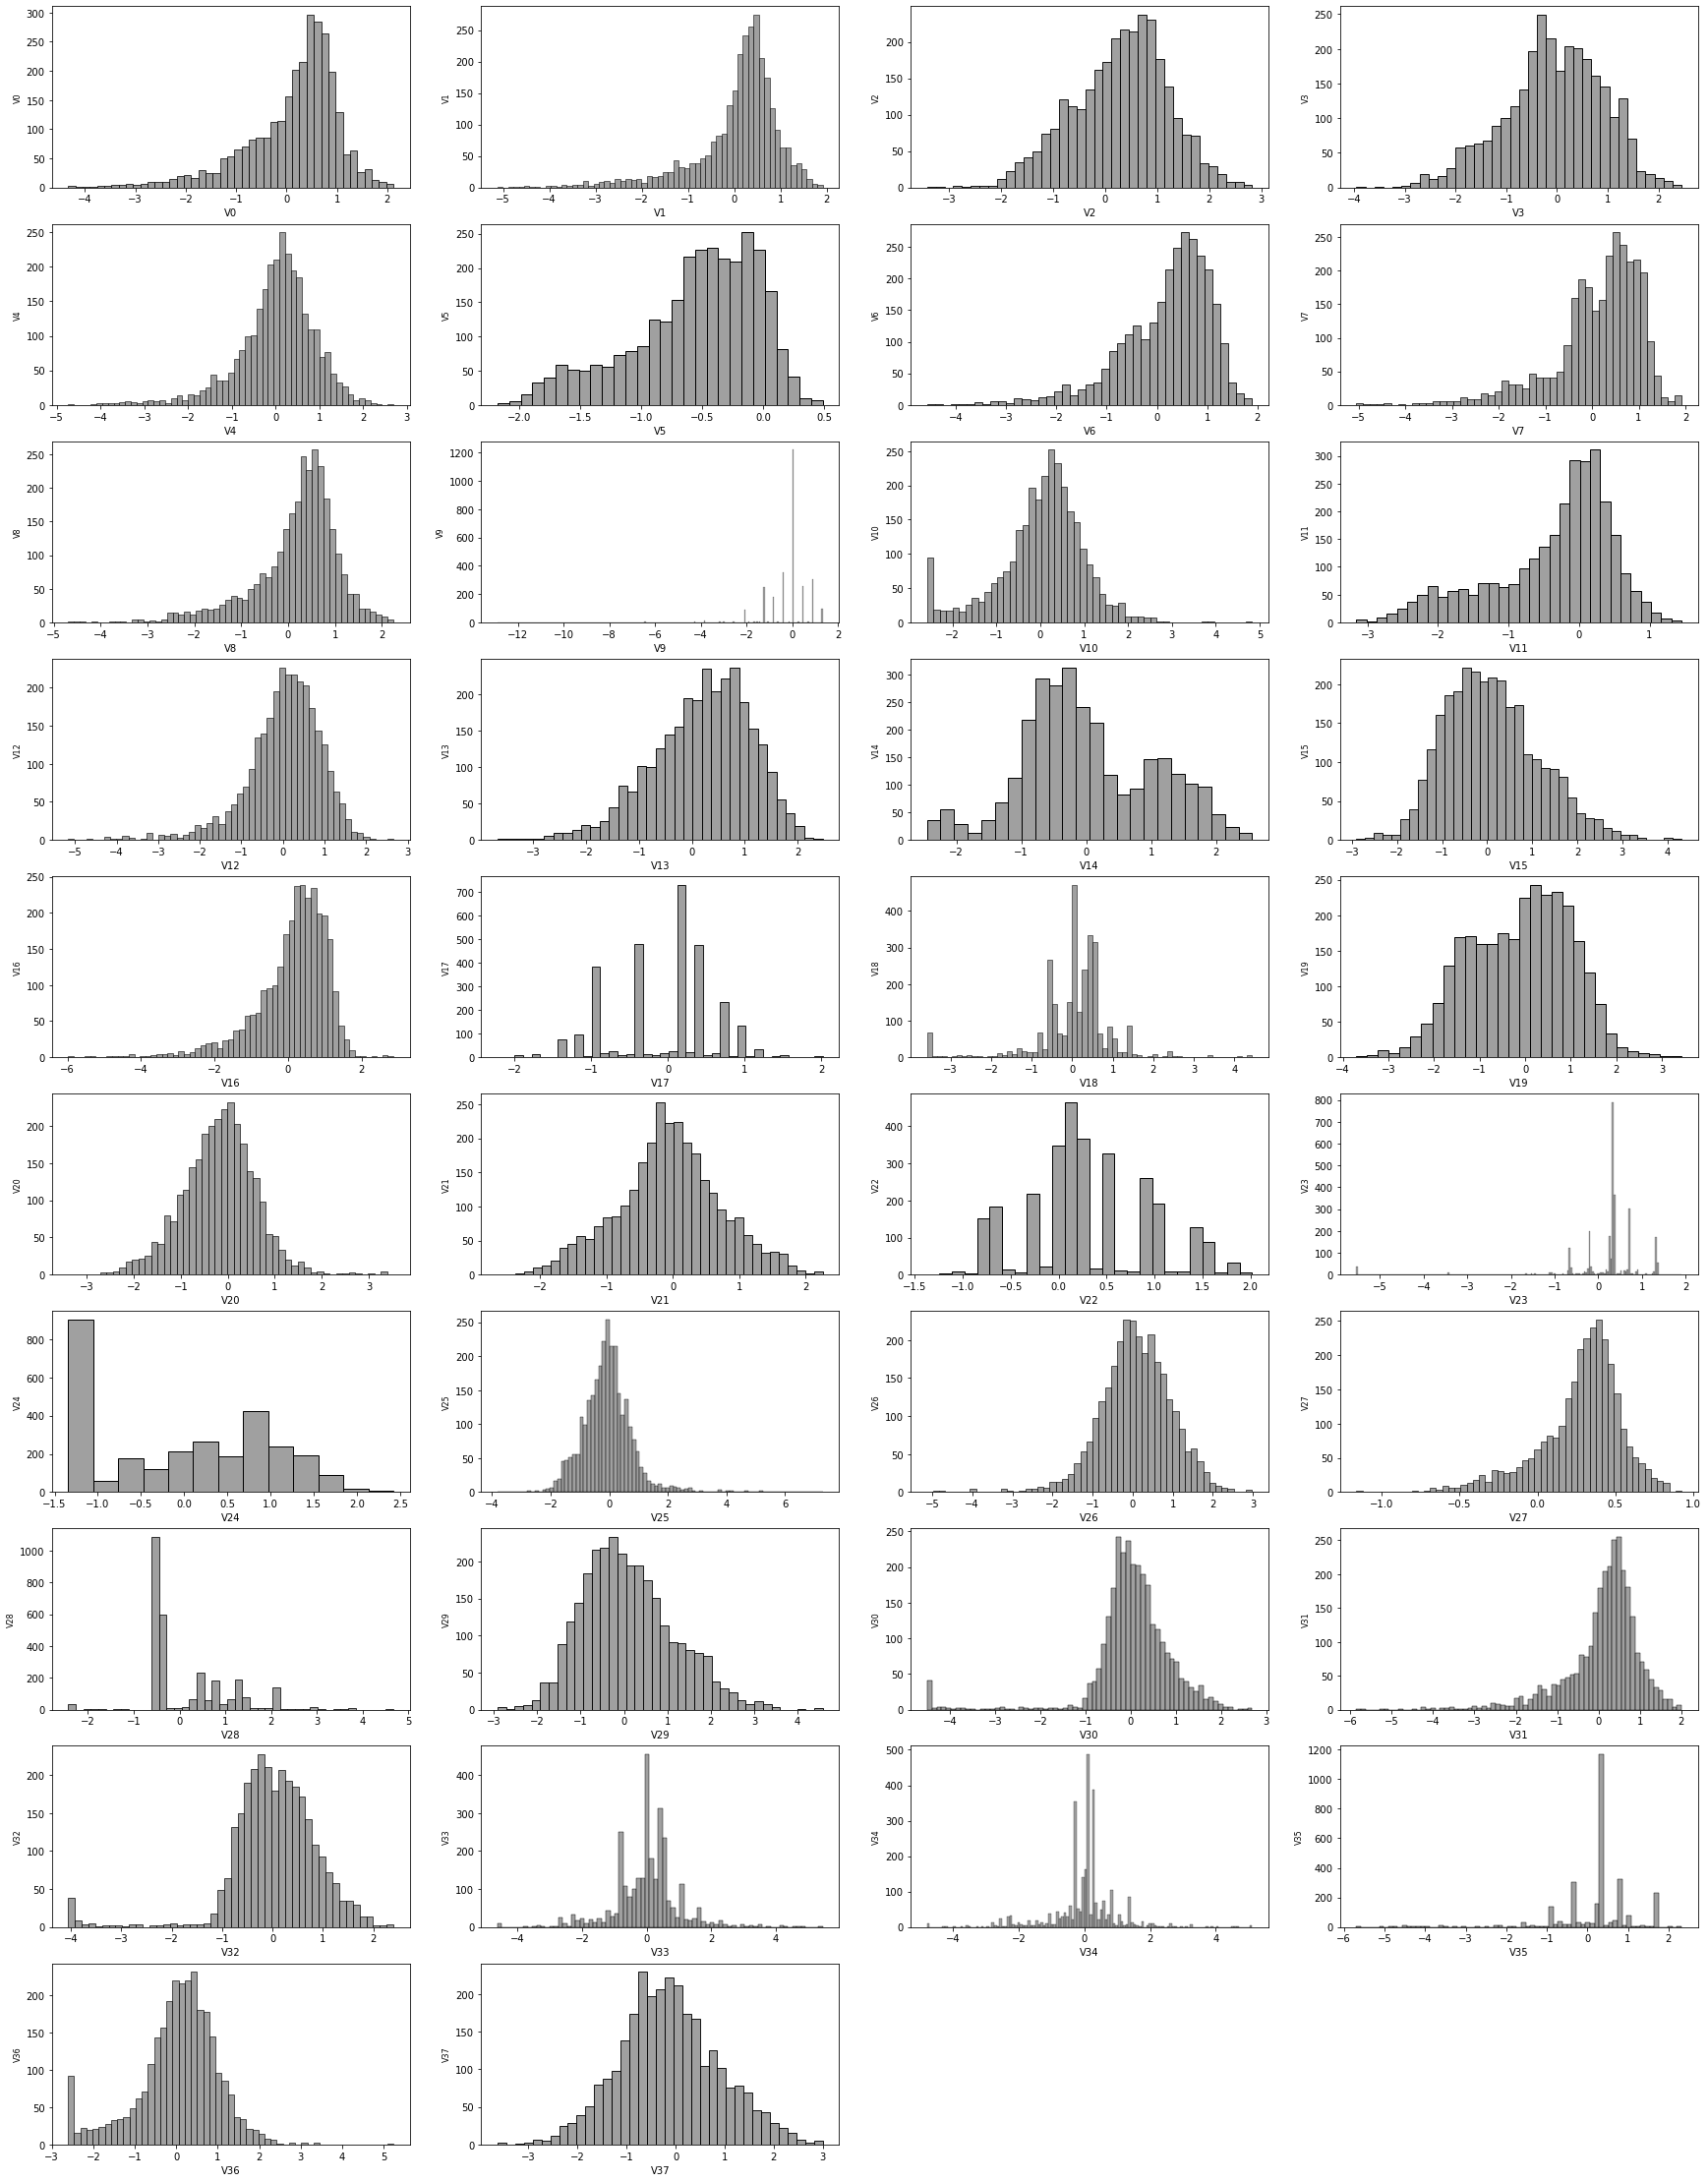

In [286]:
# Draw histplot to explore the feature variable
column = train_data.columns.tolist()[:39]
fig = plt.figure(figsize=(30, 40))
for i in range(38):
    plt.subplot(10, 4, i + 1)
    sns.histplot(train_data[column[i]], color = "gray")
    plt.ylabel(column[i], fontsize = 8)
plt.show()

# Prepare the data: data cleaning, feature selection, feature scaling

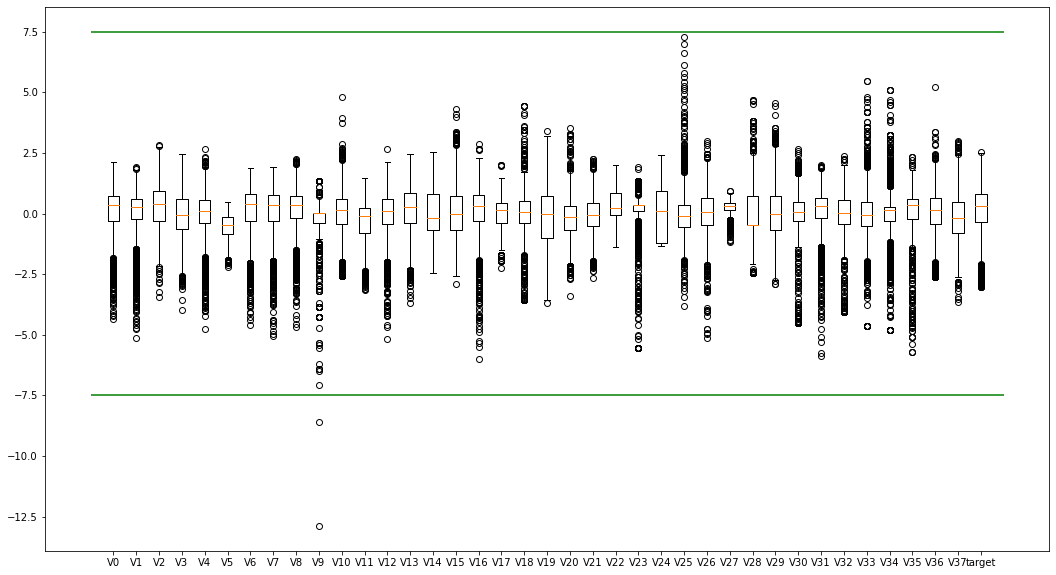

In [287]:
# Draw boxplot to observe the outliers
plt.figure(figsize = (18, 10))
plt.boxplot(x = train_data.values, labels = train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors = 'g')
plt.show()

In [288]:
train_data = train_data[train_data['V9'] > -7.5]
train_data.describe()

V0           V1           V2           V3           V4  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.123725     0.056856     0.290340    -0.068364     0.012254   
std       0.927984     0.941269     0.911231     0.970357     0.888037   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.292000    -0.224250    -0.310000    -0.652750    -0.385000   
50%       0.359500     0.273000     0.386000    -0.045000     0.109500   
75%       0.726000     0.599000     0.918750     0.623500     0.550000   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8          V9  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.00000  ...   
mean     -0.558971     0.183273     0.116274     0.178138    -0.16213  ...   
std       0.517871     0.918211     0.955418     0.895552     0.91089  ...   
min      -2.182000    -4.576000    -5.048000    -4.692000    -7.07100  ...   
25%      -0.853000    -0.310000    -0.295000    -0.158750    -0.39000  ...   
50%      -0.466000     0.388500     0.345000     0.362000     0.04200  ...   
75%      -0.154000     0.831750     0.782750     0.726000     0.04200  ...   
max       0.489000     1.895000     1.918000     2.245000     1.33500  ...   

               V29          V30          V31          V32          V33  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.097019     0.058619     0.127617     0.023626     0.008271   
std       1.060824     0.894311     0.873300     0.896509     1.007175   
min      -2.912000    -4.507000    -5.859000    -4.053000    -4.627000   
25%      -0.664000    -0.282000    -0.170750    -0.405000    -0.499000   
50%      -0.023000     0.054500     0.299500     0.040000    -0.040000   
75%       0.745000     0.488000     0.635000     0.557000     0.462000   
max       4.580000     2.689000     2.013000     2.395000     5.465000   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  
mean      0.006959     0.198513     0.030099    -0.131957     0.127451  
std       1.003411     0.985058     0.970258     1.015666     0.983144  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.199750    -0.412750    -0.798750    -0.347500  
50%       0.160000     0.364000     0.137000    -0.186000     0.314000  
75%       0.273000     0.602000     0.643750     0.493000     0.793750  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

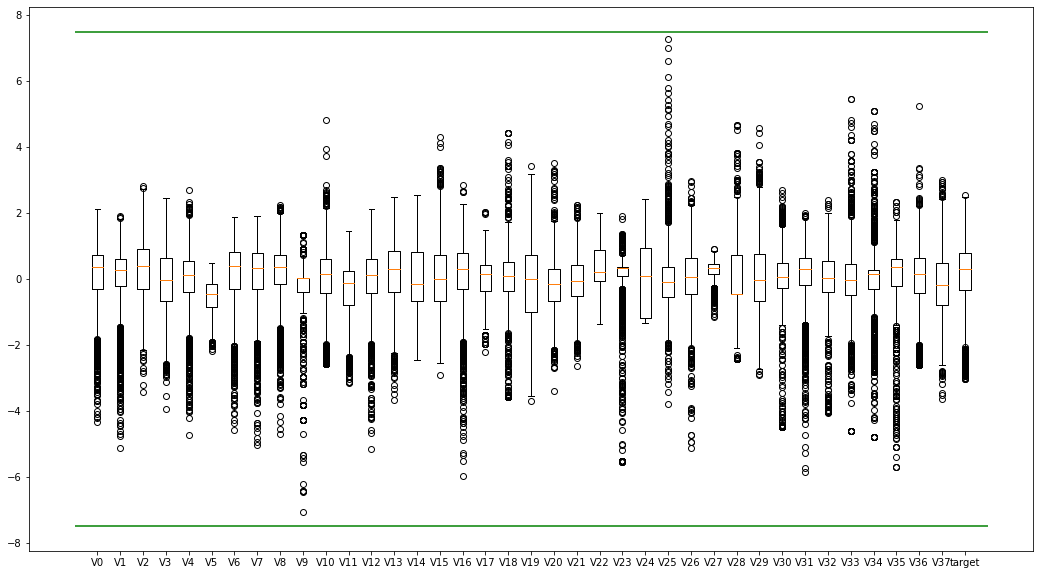

In [289]:
# Draw boxplot to observe the outliers
plt.figure(figsize = (18, 10))
plt.boxplot(x = train_data.values, labels = train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors = 'g')
plt.show()

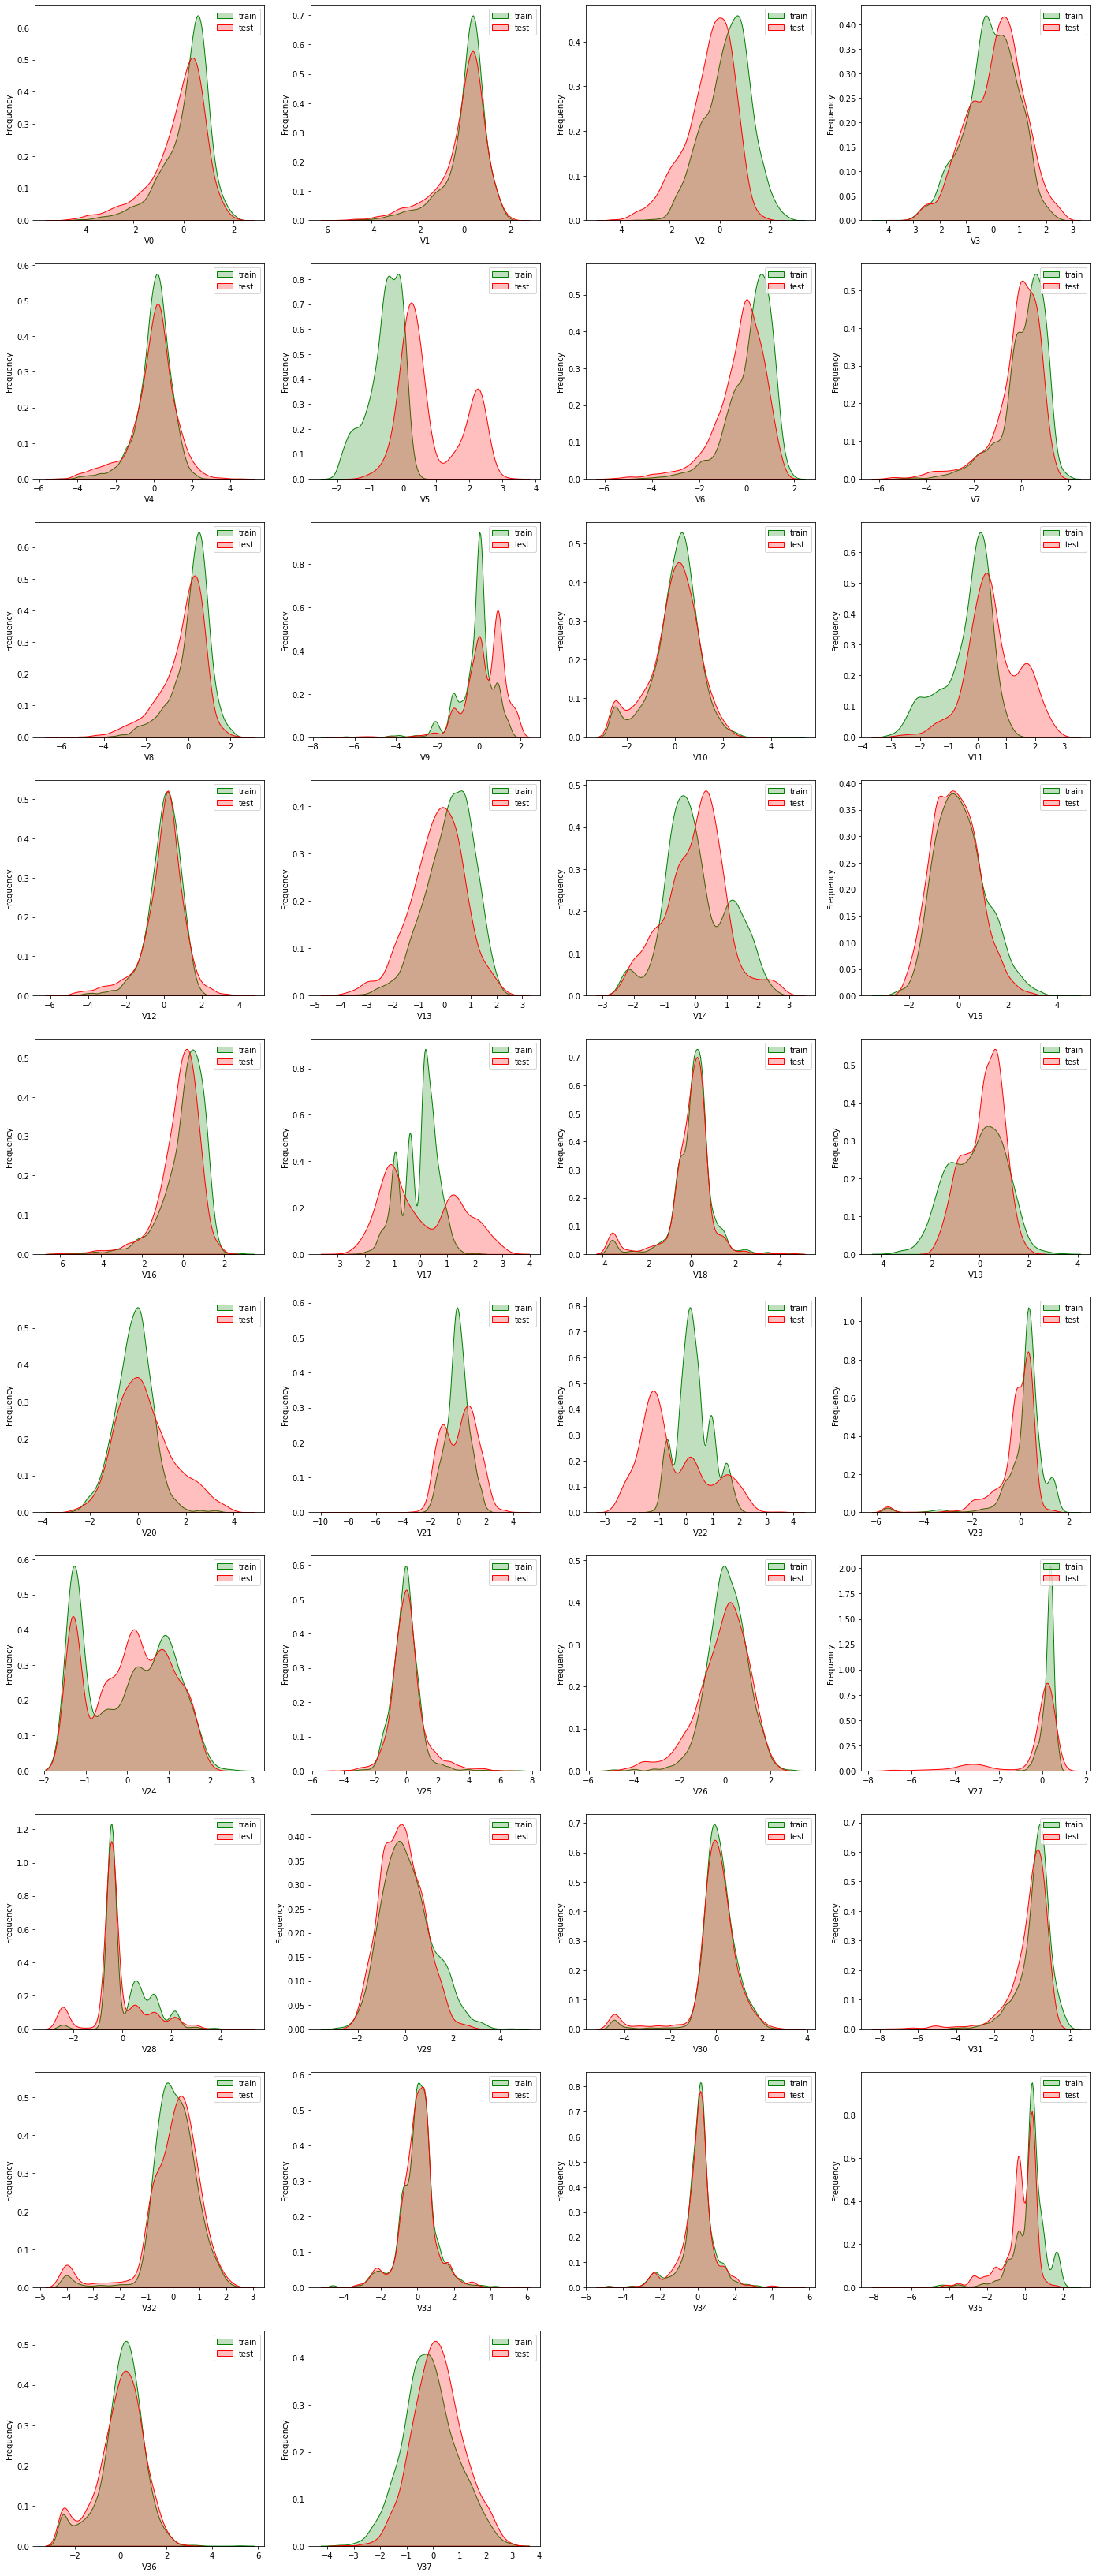

In [290]:
# compare the frequency distribution of all feature variables in the training set and test set
dist_cols = 4
dist_rows = len(test_data.columns)
plt.figure(figsize=(6 * dist_cols, 6 * dist_rows))

i = 1
for col in test_data.columns:
    ax = plt.subplot(dist_rows, dist_cols, i)
    ax = sns.kdeplot(train_data[col], color = "green", shade = True)
    ax = sns.kdeplot(test_data[col], color = "red", shade = True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i += 1
plt.show()

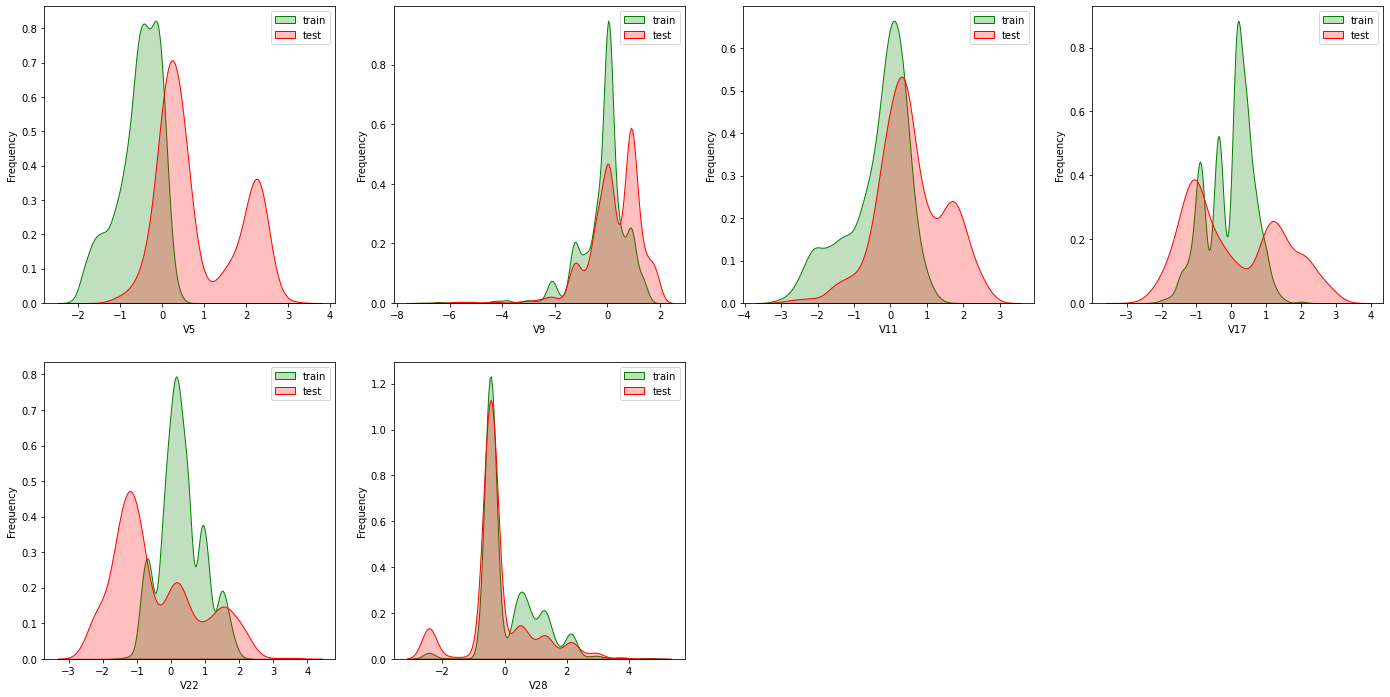

In [291]:
# features that show inconsistent frequency distributions in the training set and test set
drop_col = 4
drop_row = 2

plt.figure(figsize=(6 * drop_col,6 * drop_row))

i = 1
for col in ["V5","V9","V11","V17","V22","V28"]:
    ax = plt.subplot(drop_row, drop_col, i)
    ax = sns.kdeplot(train_data[col], color = "green", shade = True)
    ax = sns.kdeplot(test_data[col], color = "red", shade = True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i += 1
plt.show()

In [292]:
drop_columns = ['V5','V9','V11','V17','V22','V28']

In [293]:
# Compute pairwise correlation of columns
data_train1 = train_data.drop(drop_columns, axis = 1)
train_corr = data_train1.corr()
train_corr

V0        V1        V2        V3        V4        V6        V7  \
V0      1.000000  0.908566  0.463302  0.410520  0.782754  0.188990  0.141253   
V1      0.908566  1.000000  0.506259  0.385098  0.659215  0.276666  0.205090   
V2      0.463302  0.506259  1.000000  0.410944  0.058644  0.615796  0.477138   
V3      0.410520  0.385098  0.410944  1.000000  0.314930  0.234276  0.197955   
V4      0.782754  0.659215  0.058644  0.314930  1.000000 -0.116929 -0.052118   
V6      0.188990  0.276666  0.615796  0.234276 -0.116929  1.000000  0.917554   
V7      0.141253  0.205090  0.477138  0.197955 -0.052118  0.917554  1.000000   
V8      0.794264  0.875248  0.703426  0.412283  0.450757  0.468054  0.389922   
V10     0.299328  0.311666  0.346308  0.321656  0.143356  0.415846  0.311215   
V12     0.754177  0.658303  0.061303  0.306357  0.927664 -0.086448 -0.036425   
V13     0.185437  0.158080  0.204759 -0.003870  0.076776  0.138167  0.110849   
V14    -0.004655 -0.006741 -0.106969 -0.232458  0.024817  0.072481  0.163804   
V15     0.315159  0.165541 -0.224662  0.143134  0.616822 -0.431920 -0.291520   
V16     0.347594  0.436106  0.782739  0.394559  0.024196  0.847206  0.752692   
V18     0.146642  0.121361  0.130215  0.025254  0.139684  0.109563  0.098714   
V19    -0.100742 -0.093150 -0.162303 -0.245811 -0.205339  0.215063  0.158292   
V20     0.461913  0.459102  0.297712  0.290870  0.292817  0.135632  0.089310   
V21    -0.028595 -0.012153 -0.030229  0.113893  0.173310 -0.051355 -0.065164   
V23     0.229691  0.220438  0.062306  0.085850  0.203440  0.068306  0.125939   
V24    -0.326109 -0.234787  0.009413 -0.236819 -0.529578  0.071956 -0.030467   
V25    -0.201344 -0.071285  0.481556 -0.100190 -0.444252  0.438473  0.316723   
V26    -0.124712 -0.041850  0.035495 -0.028519 -0.079677  0.105913  0.160563   
V27     0.732957  0.824005  0.726125  0.393155  0.413338  0.474369  0.424341   
V29     0.303253  0.148433 -0.275643  0.116976  0.660151 -0.468338 -0.311667   
V30     0.154722  0.173418  0.174113  0.047372  0.026834  0.188514  0.170994   
V31     0.675522  0.770532  0.654191  0.421890  0.447235  0.546732  0.475298   
V32     0.048020  0.082463  0.031101 -0.090420 -0.022978  0.143720  0.123016   
V33     0.056002  0.034656  0.049850 -0.006800  0.063044  0.053904  0.034402   
V34    -0.019514 -0.029159 -0.025985 -0.031862  0.029437 -0.003255 -0.019270   
V35     0.138491  0.146117  0.042766  0.080514  0.101851  0.044250  0.110934   
V36     0.232515  0.236881  0.317218  0.324074  0.114106  0.434250  0.340679   
V37    -0.493494 -0.493305 -0.735008 -0.231483 -0.032842 -0.404691 -0.292553   
target  0.873294  0.871718  0.638896  0.513974  0.605749  0.370111  0.288109   

              V8       V10       V12  ...       V29       V30       V31  \
V0      0.794264  0.299328  0.754177  ...  0.303253  0.154722  0.675522   
V1      0.875248  0.311666  0.658303  ...  0.148433  0.173418  0.770532   
V2      0.703426  0.346308  0.061303  ... -0.275643  0.174113  0.654191   
V3      0.412283  0.321656  0.306357  ...  0.116976  0.047372  0.421890   
V4      0.450757  0.143356  0.927664  ...  0.660151  0.026834  0.447235   
V6      0.468054  0.415846 -0.086448  ... -0.468338  0.188514  0.546732   
V7      0.389922  0.311215 -0.036425  ... -0.311667  0.170994  0.475298   
V8      1.000000  0.419469  0.422425  ... -0.011356  0.150031  0.878327   
V10     0.419469  1.000000  0.143674  ... -0.107113 -0.037997  0.561224   
V12     0.422425  0.143674  1.000000  ...  0.668480  0.034484  0.442482   
V13     0.152908 -0.061494  0.100000  ...  0.007405  0.027619  0.113688   
V14     0.007655 -0.078747  0.021449  ...  0.056935 -0.006871  0.011100   
V15     0.018015 -0.048524  0.643960  ...  0.951355 -0.111126  0.011607   
V16     0.680003  0.547277  0.026311  ... -0.342896  0.156160  0.778591   
V18     0.092973 -0.025547  0.124636  ...  0.056541  0.463470  0.080884   
V19    -0.145017  0.074631 -0.147759  ... -0.205393  0.099008 -0.131468   
V20     0.412896  

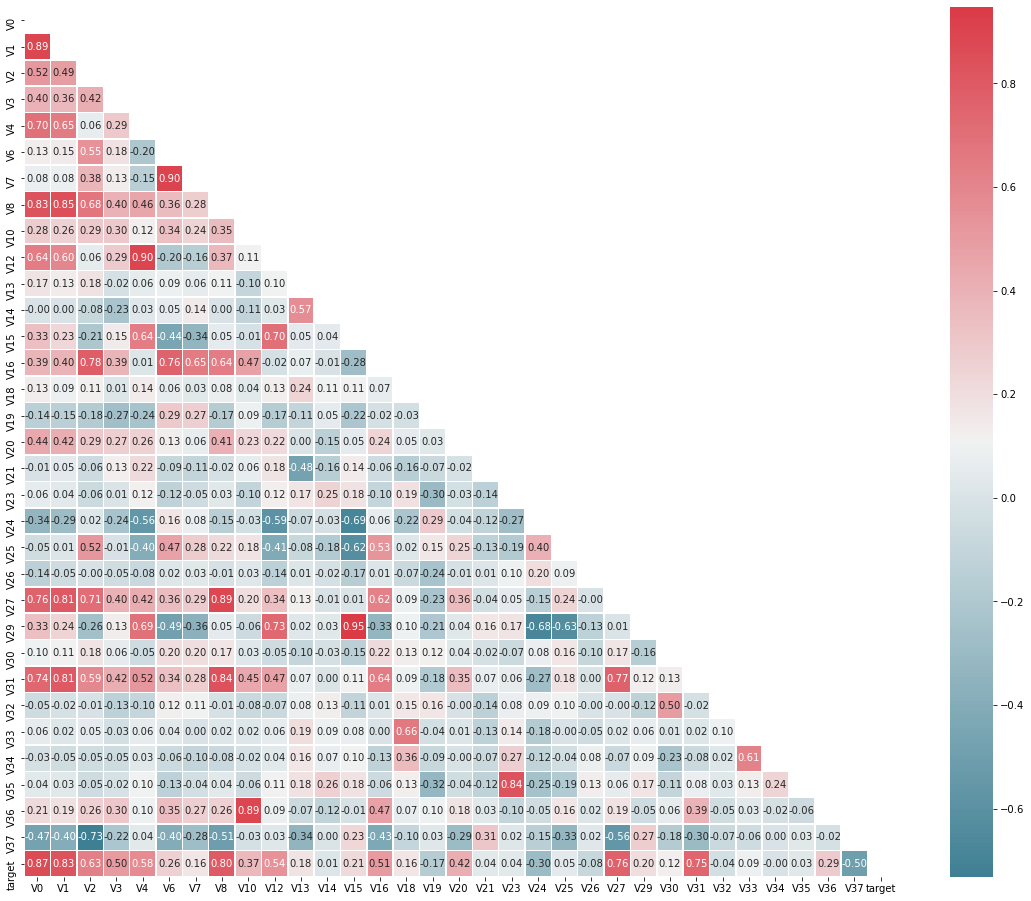

In [294]:
# Draw Spearman rank correlation heatmap
data_train1 = train_data.drop(drop_columns, axis = 1)

plt.figure(figsize = (20, 16))
colnm = data_train1.columns.tolist()
mcorr = data_train1[colnm].corr(method = "spearman")
mask = np.zeros_like(mcorr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)
g = sns.heatmap(mcorr, mask = mask, cmap = cmap, square = True, linewidths = .5, annot = True, fmt = '0.2f')
plt.show()

In [295]:
data_train1.describe()

V0           V1           V2           V3           V4  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.123725     0.056856     0.290340    -0.068364     0.012254   
std       0.927984     0.941269     0.911231     0.970357     0.888037   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.292000    -0.224250    -0.310000    -0.652750    -0.385000   
50%       0.359500     0.273000     0.386000    -0.045000     0.109500   
75%       0.726000     0.599000     0.918750     0.623500     0.550000   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V6           V7           V8          V10          V12  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.183273     0.116274     0.178138     0.034490     0.022239  ...   
std       0.918211     0.955418     0.895552     0.966579     0.893055  ...   
min      -4.576000    -5.048000    -4.692000    -2.584000    -5.165000  ...   
25%      -0.310000    -0.295000    -0.158750    -0.420000    -0.419000  ...   
50%       0.388500     0.345000     0.362000     0.157000     0.123000  ...   
75%       0.831750     0.782750     0.726000     0.619000     0.615750  ...   
max       1.895000     1.918000     2.245000     4.830000     2.121000  ...   

               V29          V30          V31          V32          V33  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.097019     0.058619     0.127617     0.023626     0.008271   
std       1.060824     0.894311     0.873300     0.896509     1.007175   
min      -2.912000    -4.507000    -5.859000    -4.053000    -4.627000   
25%      -0.664000    -0.282000    -0.170750    -0.405000    -0.499000   
50%      -0.023000     0.054500     0.299500     0.040000    -0.040000   
75%       0.745000     0.488000     0.635000     0.557000     0.462000   
max       4.580000     2.689000     2.013000     2.395000     5.465000   

               V34          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  
mean      0.006959     0.198513     0.030099    -0.131957     0.127451  
std       1.003411     0.985058     0.970258     1.015666     0.983144  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.199750    -0.412750    -0.798750    -0.347500  
50%       0.160000     0.364000     0.137000    -0.186000     0.314000  
75%       0.273000     0.602000     0.643750     0.493000     0.793750  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 33 columns]

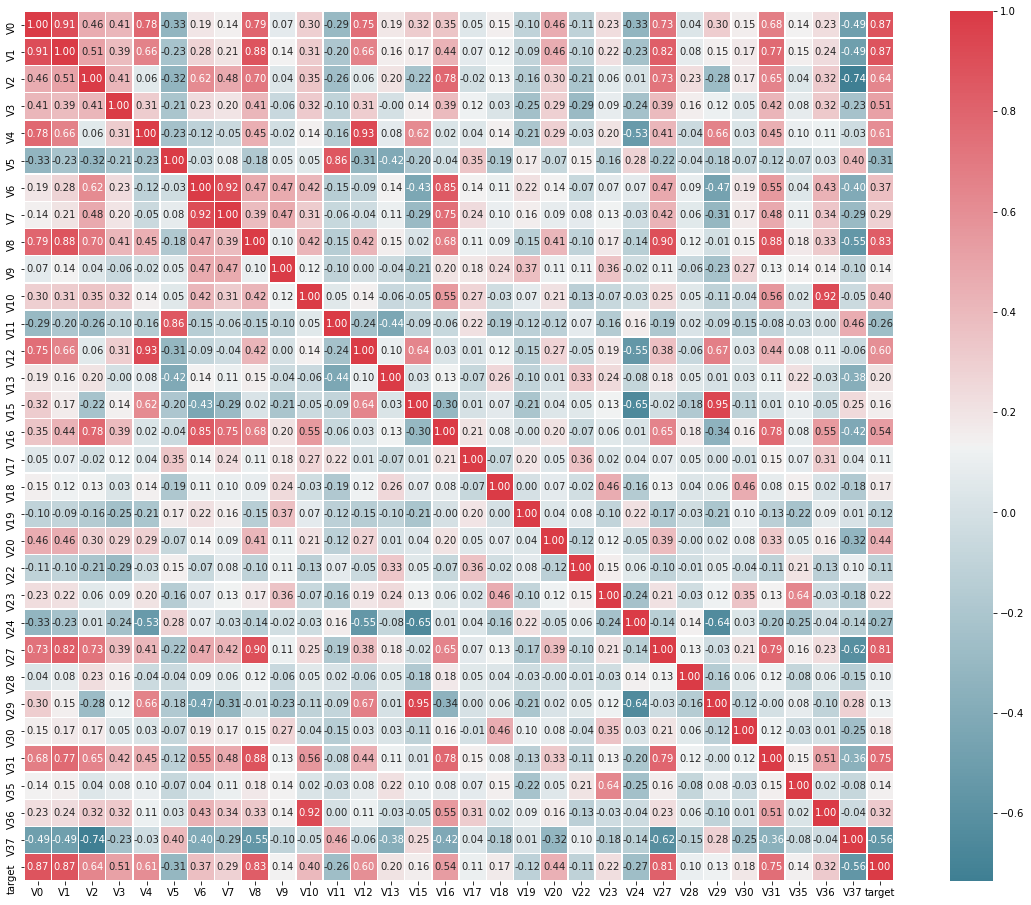

In [339]:
# get the features which have abs(correlation coefficient) > threshold with respect to the target variable
threshold = 0.1

corrmat = train_data.corr()
top_corr_features = corrmat.index[abs(corrmat["target"]) > threshold]
plt.figure(figsize = (20, 16))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
g = sns.heatmap(train_data[top_corr_features].corr(), square = True, linewidths = .5, annot = True, cmap=cmap, fmt = '0.2f')

In [297]:
# Threshold for removing correlated variables
threshold = 0.1

# Absolute value correlation matrix
corr_matrix = data_train1.corr().abs()
# drop features which have low correlation coefficient with respect to the target variable
drop_col = corr_matrix[corr_matrix["target"] < threshold].index

In [298]:
drop_col

Index(['V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34'], dtype='object')

In [299]:
# merge train_set and test_set
data_train1 = train_data.drop(drop_columns, axis = 1)
train_x = data_train1.drop(['target'], axis = 1)
test_x = test_data.drop(drop_columns, axis = 1)

data_all = pd.concat([train_x, test_x])

data_all.drop(drop_col, axis = 1, inplace = True)
# View data
data_all.head(10)

V0     V1     V2     V3     V4     V6     V7     V8    V10    V12  ...  \
0  0.566  0.016 -0.143  0.407  0.452 -1.812 -2.360 -0.436 -0.940 -0.073  ...   
1  0.968  0.437  0.066  0.566  0.194 -1.566 -2.360  0.332  0.188 -0.134  ...   
2  1.013  0.568  0.235  0.370  0.112 -1.367 -2.360  0.396  0.874 -0.072  ...   
3  0.733  0.368  0.283  0.165  0.599 -1.200 -2.086  0.403  0.011 -0.014  ...   
4  0.684  0.638  0.260  0.209  0.337 -1.073 -2.086  0.314 -0.251  0.199  ...   
5  0.445  0.627  0.408  0.220  0.458 -1.009 -1.896  0.481 -0.511  0.294  ...   
6  0.889  0.416  0.640  0.356  0.224 -0.812 -1.823  0.729 -0.256  0.425  ...   
7  0.984  0.529  0.704  0.438  0.258 -0.682 -1.721  0.753 -0.067  0.272  ...   
8  0.948  0.850  0.584  0.459  0.591 -0.591 -1.524  0.763  0.205  0.387  ...   
9  1.157  1.055  0.638  0.617  1.483 -0.612 -1.524  0.968  0.145  0.688  ...   

     V20    V23    V24    V27    V29    V30    V31    V35    V36    V37  
0  0.610  0.356  0.800  0.168  0.136  0.109 -0.615 -5.101 -2.608 -3.508  
1  0.588  0.357  0.801  0.338 -0.128  0.124  0.032  0.364 -0.335 -0.730  
2  0.576  0.355  0.961  0.326 -0.009  0.361  0.277  0.364  0.765 -0.589  
3  0.272  0.352  1.435  0.277  0.015  0.417  0.279  0.364  0.333 -0.112  
4  0.106  0.352  0.881  0.332  0.183  1.078  0.328  0.364 -0.280 -0.028  
5  0.029  0.349  0.798  0.356  0.454  0.674  0.358  0.364 -0.191 -0.883  
6  0.156  0.352  0.801  0.401  0.454  0.081  0.243  0.364 -0.155 -1.318  
7  0.254  0.366  0.798  0.409  0.139 -0.050  0.428  0.364  0.100 -0.899  
8  0.250  0.366  0.798  0.490  0.188  0.467  0.597  0.364  0.053 -0.553  
9  0.263  0.358 -0.612  0.512  0.860  0.456  0.916  0.364  0.151 -1.157  

[10 rows x 25 columns]

In [300]:
# Normalize numeric columns
cols_numeric = list(data_all.columns)

def scale_minmax(col):
    return (col - col.min()) / (col.max() - col.min())

data_all[cols_numeric] = data_all[cols_numeric].apply(scale_minmax, axis = 0)
data_all.describe()

V0           V1           V2           V3           V4  \
count  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000   
mean      0.694223     0.721416     0.602336     0.603091     0.523699   
std       0.144205     0.131431     0.140646     0.152472     0.106415   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626748     0.679614     0.514414     0.503888     0.478182   
50%       0.729488     0.752629     0.617072     0.614270     0.535760   
75%       0.790195     0.799619     0.700534     0.710398     0.584930   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000  ...   
mean      0.748843     0.745743     0.715619     0.348530     0.578447  ...   
std       0.132581     0.132603     0.118119     0.134752     0.105032  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.683391     0.696938     0.665112     0.284394     0.532839  ...   
50%       0.774125     0.771974     0.742884     0.366469     0.591635  ...   
75%       0.842325     0.836405     0.790894     0.432897     0.641971  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V20          V23          V24          V27          V29  \
count  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000   
mean      0.456225     0.744747     0.356851     0.881404     0.388627   
std       0.134055     0.133256     0.265481     0.128248     0.133435   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.370743     0.719362     0.040616     0.888704     0.292379   
50%       0.447305     0.788817     0.381736     0.916015     0.375734   
75%       0.522727     0.792706     0.574861     0.932555     0.471837   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V30          V31          V35          V36          V37  
count  4811.000000  4811.000000  4811.000000  4811.000000  4811.000000  
mean      0.589703     0.792693     0.762911     0.332340     0.545656  
std       0.130267     0.102994     0.102008     0.127415     0.150233  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.550157     0.761714     0.727273     0.270647     0.445647  
50%       0.594428     0.815055     0.800020     0.347056     0.539167  
75%       0.650798     0.852229     0.800020     0.414734     0.642685  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 25 columns]

In [301]:
train_data_process = train_data[cols_numeric]
train_data_process = train_data_process[cols_numeric].apply(scale_minmax, axis = 0)
train_data_process = pd.concat([train_data_process, train_data['target']], axis = 1)

test_data_process = test_data[cols_numeric]
test_data_process = test_data_process[cols_numeric].apply(scale_minmax, axis = 0)

In [302]:
train_data_process.describe()

V0           V1           V2           V3           V4  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.690633     0.735633     0.593844     0.606212     0.639787   
std       0.143740     0.133703     0.145844     0.151311     0.119504   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.626239     0.695703     0.497759     0.515087     0.586328   
50%       0.727153     0.766335     0.609155     0.609855     0.652873   
75%       0.783922     0.812642     0.694422     0.714096     0.712152   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      0.735477     0.741354     0.702053     0.353182     0.711946  ...   
std       0.141896     0.137154     0.129098     0.130372     0.122571  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.659249     0.682314     0.653489     0.291880     0.651386  ...   
50%       0.767192     0.774189     0.728557     0.369706     0.725775  ...   
75%       0.835690     0.837030     0.781029     0.432021     0.793405  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V23          V24          V27          V29          V30  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.765564     0.351218     0.687717     0.401631     0.634466   
std       0.129909     0.274291     0.129398     0.141594     0.124279   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.757250     0.040616     0.633437     0.300053     0.587132   
50%       0.789474     0.382002     0.712781     0.385611     0.633894   
75%       0.793602     0.604128     0.768789     0.488121     0.694136   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V31          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  
mean      0.760495     0.734944     0.336235     0.527608     0.127451  
std       0.110938     0.122840     0.123663     0.153192     0.983144  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       0.722593     0.685279     0.279792     0.427036    -0.347500  
50%       0.782330     0.755580     0.349860     0.519457     0.314000  
75%       0.824949     0.785260     0.414447     0.621870     0.793750  
max       1.000000     1.000000     1.000000     1.000000     2.538000  

[8 rows x 26 columns]

In [303]:
test_data_process.describe()

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean      0.669597     0.710316     0.617794     0.574531     0.521693   
std       0.155240     0.141518     0.155649     0.176038     0.122104   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.600231     0.662066     0.530583     0.447695     0.470839   
50%       0.705670     0.746977     0.644726     0.594659     0.536292   
75%       0.775673     0.798764     0.732220     0.692125     0.588655   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V6           V7           V8          V10          V12  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      0.748907     0.776610     0.684102     0.444008     0.574864  ...   
std       0.146875     0.148184     0.128253     0.183120     0.119798  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.685105     0.728879     0.624070     0.353447     0.528794  ...   
50%       0.775672     0.803961     0.715129     0.466936     0.592371  ...   
75%       0.850773     0.874768     0.772529     0.564287     0.639765  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               V20          V23          V24          V27          V29  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean      0.453990     0.770062     0.437481     0.844051     0.417026   
std       0.173363     0.142784     0.302333     0.189765     0.162023   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.331358     0.772661     0.225909     0.881201     0.293468   
50%       0.429088     0.780481     0.456924     0.920757     0.407360   
75%       0.553275     0.855488     0.682514     0.938773     0.530083   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V30          V31          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean      0.578575     0.822515     0.784882     0.468409     0.556264  
std       0.147321     0.124748     0.103509     0.190319     0.147730  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.545122     0.791365     0.779187     0.368440     0.457672  
50%       0.590766     0.854482     0.787822     0.492046     0.549395  
75%       0.647920     0.895135     0.857127     0.595904     0.650699  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 25 columns]

In [304]:
# merge train_set and test_set
train_data_process["origin"] = "train"
test_data_process["origin"] = "test"

data_all2 = pd.concat([train_data_process, test_data_process], axis = 0, ignore_index = True)

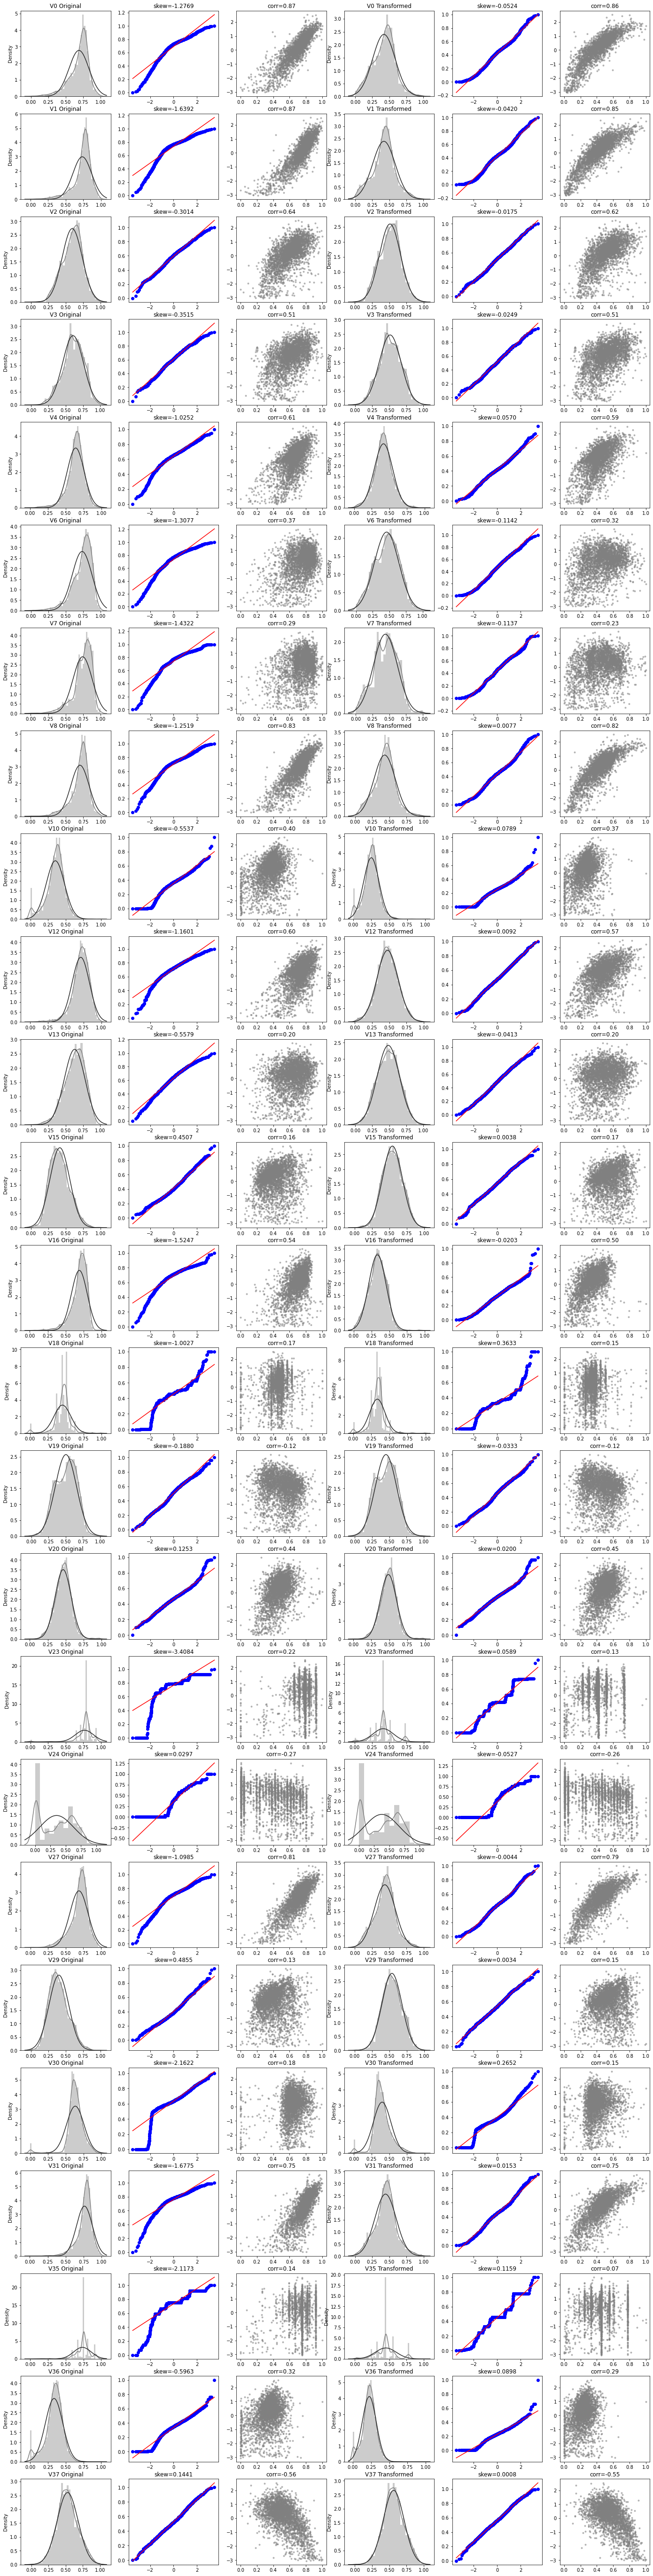

In [305]:
fcols = 6
frows = len(cols_numeric)
plt.figure(figsize = (4 * fcols, 4 * frows))
i = 0

for var in cols_numeric:
    if var != 'target':
        dat = data_all2[[var, 'target']].dropna()
        
        i += 1
        plt.subplot(frows, fcols, i)
        sns.distplot(dat[var], color = "gray", fit = stats.norm);
        plt.title(var + ' Original')
        plt.xlabel('')
        
        i += 1
        plt.subplot(frows, fcols, i)
        _ = stats.probplot(dat[var], plot = plt)
        plt.title('skew=' + '{:.4f}'.format(stats.skew(dat[var])))
        plt.xlabel('')
        plt.ylabel('')
        
        i += 1
        plt.subplot(frows, fcols, i)
        plt.plot(dat[var], dat['target'], '.', color = "gray", alpha = 0.5)
        plt.title('corr=' + '{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
        i += 1
        plt.subplot(frows, fcols, i)
        trans_var, lambda_var = stats.boxcox(dat[var].dropna() + 1)
        trans_var = scale_minmax(trans_var)      
        sns.distplot(trans_var, color = "gray", fit = stats.norm);
        plt.title(var + ' Transformed')
        plt.xlabel('')
        
        i += 1
        plt.subplot(frows, fcols, i)
        _ = stats.probplot(trans_var, plot = plt)
        plt.title('skew=' + '{:.4f}'.format(stats.skew(trans_var)))
        plt.xlabel('')
        plt.ylabel('')
        
        i += 1
        plt.subplot(frows, fcols, i)
        plt.plot(trans_var, dat['target'], '.', color = "gray", alpha = 0.5)
        plt.title('corr=' + '{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))
plt.show()

In [306]:
# Apply boxcox transform to get better normal distribution
cols_transform = data_all2.columns[0:-2]
for col in cols_transform:
    # transform column
    data_all2.loc[:, col], _ = stats.boxcox(data_all2.loc[:, col] + 1)

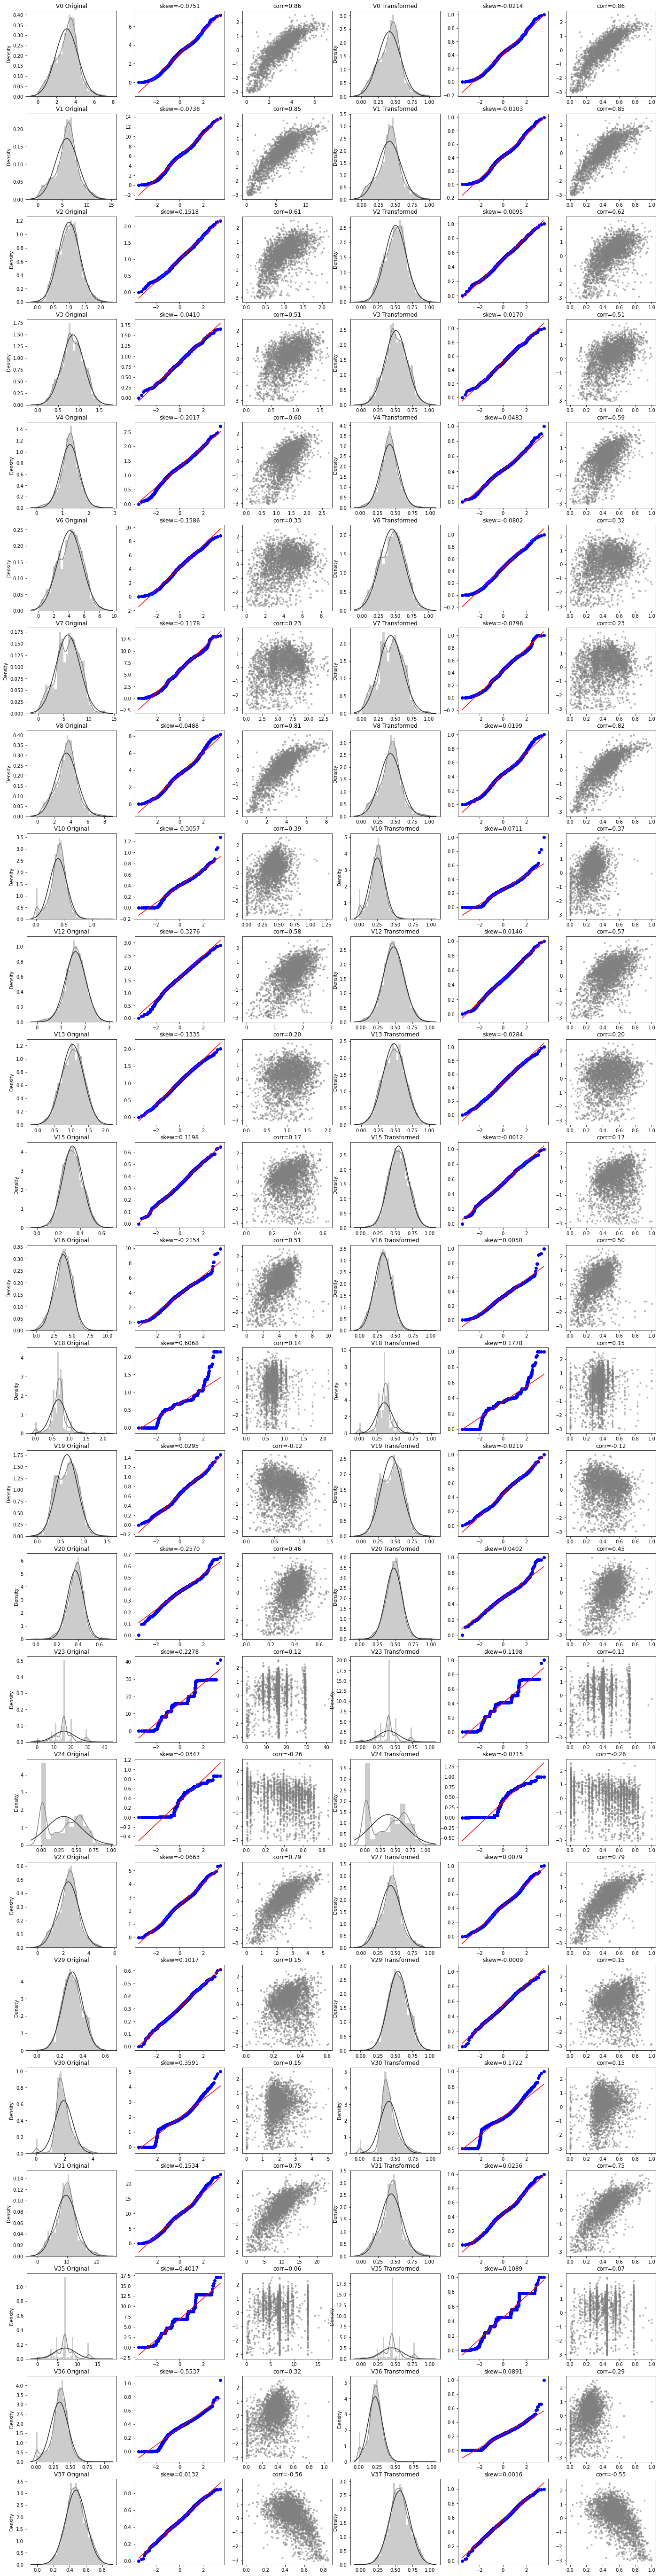

In [307]:
fcols = 6
frows = len(cols_numeric)
plt.figure(figsize = (4 * fcols, 4 * frows))
i = 0

for var in cols_numeric:
    if var != 'target':
        dat = data_all2[[var, 'target']].dropna()
        
        i += 1
        plt.subplot(frows, fcols, i)
        sns.distplot(dat[var], color = "gray", fit = stats.norm);
        plt.title(var + ' Original')
        plt.xlabel('')
        
        i += 1
        plt.subplot(frows, fcols, i)
        _ = stats.probplot(dat[var], plot = plt)
        plt.title('skew=' + '{:.4f}'.format(stats.skew(dat[var])))
        plt.xlabel('')
        plt.ylabel('')
        
        i += 1
        plt.subplot(frows, fcols, i)
        plt.plot(dat[var], dat['target'], '.', color = "gray", alpha = 0.5)
        plt.title('corr=' + '{:.2f}'.format(np.corrcoef(dat[var], dat['target'])[0][1]))
 
        i += 1
        plt.subplot(frows, fcols, i)
        trans_var, lambda_var = stats.boxcox(dat[var].dropna() + 1)
        trans_var = scale_minmax(trans_var)      
        sns.distplot(trans_var, color = "gray", fit = stats.norm);
        plt.title(var + ' Transformed')
        plt.xlabel('')
        
        i += 1
        plt.subplot(frows, fcols, i)
        _ = stats.probplot(trans_var, plot = plt)
        plt.title('skew=' + '{:.4f}'.format(stats.skew(trans_var)))
        plt.xlabel('')
        plt.ylabel('')
        
        i += 1
        plt.subplot(frows, fcols, i)
        plt.plot(trans_var, dat['target'], '.', color = "gray", alpha = 0.5)
        plt.title('corr=' + '{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))
plt.show()

count    2886.000000
mean        0.127451
std         0.983144
min        -3.044000
25%        -0.347500
50%         0.314000
75%         0.793750
max         2.538000
Name: target, dtype: float64


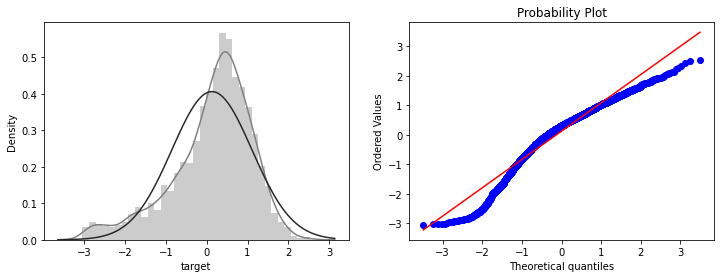

In [308]:
# transform target variable
print(data_all2.target.describe())

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.distplot(data_all2.target.dropna(), color = "gray", fit = stats.norm);
plt.subplot(1, 2, 2)
_ = stats.probplot(data_all2.target.dropna(), plot = plt)
plt.show()

count    2886.000000
mean        1.130331
std         0.393954
min         0.291057
25%         0.868577
50%         1.135776
75%         1.379661
max         2.798463
Name: target, dtype: float64


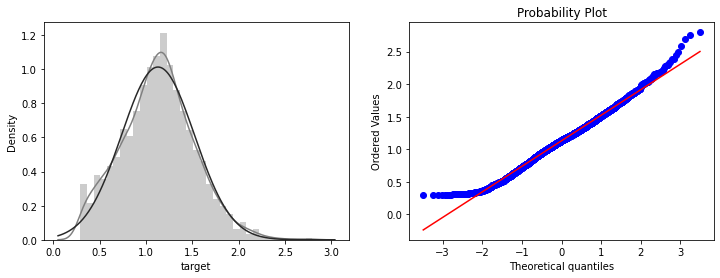

In [309]:
# Log transform target variable to improve normality
sp = train_data_process.target
train_data_process.target1 = np.power(1.5, sp)
print(train_data_process.target1.describe())

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.distplot(train_data_process.target1.dropna(), color = "gray", fit = stats.norm);
plt.subplot(1, 2, 2)
_ = stats.probplot(train_data_process.target1.dropna(), plot = plt)
plt.show()

In [310]:
from sklearn.model_selection import train_test_split
# function to get training samples
def get_training_data():
    # extract training samples
    df_train = data_all2[data_all2["origin"] == "train"]
    df_train["label"] = train_data_process.target1
    # split target and features
    y = df_train.target
    X = df_train.drop(["origin", "target", "label"], axis = 1)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 100)
    return X, X_train, X_valid, y_train, y_valid

# extract test data (without target)
def get_test_data():
    df_test = data_all2[data_all2["origin"] == "test"].reset_index(drop = True)
    return df_test.drop(["origin","target"], axis = 1)

In [311]:
train_data_transformed = get_training_data()[0]
test_data_transformed = get_test_data()

train_data_transformed = train_data_transformed[cols_numeric]
train_data_transformed = pd.concat([train_data_transformed, train_data['target']], axis = 1)

test_data_transformed = test_data_transformed[cols_numeric]

In [312]:
X = train_data_transformed.drop(["target"], axis = 1)
y = train_data_transformed.target
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [313]:
X.describe()

V0           V1           V2           V3           V4  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      3.084673     5.897727     0.997967     0.858511     1.284816   
std       1.203398     2.308961     0.338528     0.267233     0.353541   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.291904     4.614250     0.755804     0.684900     1.092046   
50%       3.223635     6.063387     1.005749     0.849319     1.295631   
75%       3.861214     7.202843     1.219828     1.044498     1.493726   
max       7.232146    13.792896     2.163144     1.658570     2.705044   

                V6           V7           V8          V10          V12  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      4.144903     5.848752     3.471861     0.394170     1.609055  ...   
std       1.614309     2.366142     1.282399     0.154102     0.427762  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.928990     4.240705     2.739613     0.316883     1.351995  ...   
50%       4.260735     6.030146     3.552818     0.409475     1.622515  ...   
75%       5.326803     7.579579     4.224608     0.485964     1.894704  ...   
max       8.765223    13.195961     8.187028     1.273848     2.896593  ...   

               V20          V23          V24          V27          V29  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      0.373261    15.851425     0.321745     2.408902     0.310372   
std       0.076174     5.997479     0.246241     0.823488     0.087435   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.328159    13.648699     0.040312     1.931523     0.249494   
50%       0.379241    15.928824     0.358585     2.468628     0.306356   
75%       0.422238    16.243769     0.549829     2.907691     0.368386   
max       0.676772    40.882471     0.867649     5.355020     0.607790   

               V30          V31          V35          V36          V37  
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  
mean      1.944739     9.633388     6.871262     0.342736     0.476163  
std       0.622008     3.635358     2.622866     0.127299     0.127577  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.595888     7.543024     5.151464     0.283880     0.393987  
50%       1.854287     9.758754     6.874828     0.356141     0.472142  
75%       2.228634    11.659738     7.734723     0.423127     0.556380  
max       5.020033    23.175122    17.094339     1.044751     0.849112  

[8 rows x 25 columns]

In [314]:
y.describe()

count    2886.000000
mean        0.127451
std         0.983144
min        -3.044000
25%        -0.347500
50%         0.314000
75%         0.793750
max         2.538000
Name: target, dtype: float64

In [315]:
train_data_transformed.describe()

V0           V1           V2           V3           V4  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean      3.084673     5.897727     0.997967     0.858511     1.284816   
std       1.203398     2.308961     0.338528     0.267233     0.353541   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.291904     4.614250     0.755804     0.684900     1.092046   
50%       3.223635     6.063387     1.005749     0.849319     1.295631   
75%       3.861214     7.202843     1.219828     1.044498     1.493726   
max       7.232146    13.792896     2.163144     1.658570     2.705044   

                V6           V7           V8          V10          V12  ...  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  ...   
mean      4.144903     5.848752     3.471861     0.394170     1.609055  ...   
std       1.614309     2.366142     1.282399     0.154102     0.427762  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.928990     4.240705     2.739613     0.316883     1.351995  ...   
50%       4.260735     6.030146     3.552818     0.409475     1.622515  ...   
75%       5.326803     7.579579     4.224608     0.485964     1.894704  ...   
max       8.765223    13.195961     8.187028     1.273848     2.896593  ...   

               V23          V24          V27          V29          V30  \
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000   
mean     15.851425     0.321745     2.408902     0.310372     1.944739   
std       5.997479     0.246241     0.823488     0.087435     0.622008   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      13.648699     0.040312     1.931523     0.249494     1.595888   
50%      15.928824     0.358585     2.468628     0.306356     1.854287   
75%      16.243769     0.549829     2.907691     0.368386     2.228634   
max      40.882471     0.867649     5.355020     0.607790     5.020033   

               V31          V35          V36          V37       target  
count  2886.000000  2886.000000  2886.000000  2886.000000  2886.000000  
mean      9.633388     6.871262     0.342736     0.476163     0.127451  
std       3.635358     2.622866     0.127299     0.127577     0.983144  
min       0.000000     0.000000     0.000000     0.000000    -3.044000  
25%       7.543024     5.151464     0.283880     0.393987    -0.347500  
50%       9.758754     6.874828     0.356141     0.472142     0.314000  
75%      11.659738     7.734723     0.423127     0.556380     0.793750  
max      23.175122    17.094339     1.044751     0.849112     2.538000  

[8 rows x 26 columns]

In [316]:
test_data_transformed.describe()

V0           V1           V2           V3           V4  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean      2.915281     5.419857     1.058981     0.807795     0.941606   
std       1.230027     2.277105     0.355969     0.303826     0.308371   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.088864     4.031781     0.826052     0.575424     0.782911   
50%       3.004738     5.633435     1.092597     0.822124     0.951454   
75%       3.762996     6.844210     1.321297     1.002100     1.098841   
max       7.232146    13.792896     2.163144     1.658570     2.705044   

                V6           V7           V8          V10          V12  ...  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  ...   
mean      4.353067     6.716773     3.265202     0.509840     1.136343  ...   
std       1.729271     2.684709     1.200218     0.224002     0.341297  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       3.213139     5.083272     2.463486     0.389860     0.967307  ...   
50%       4.382652     6.727843     3.395149     0.529721     1.157688  ...   
75%       5.587784     8.658669     4.109524     0.655073     1.312347  ...   
max       8.765223    13.195961     8.187028     1.273848     2.896593  ...   

               V20          V23          V24          V27          V29  \
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000   
mean      0.362274    16.504563     0.396662     3.871662     0.318112   
std       0.114267     6.309890     0.266739     1.269780     0.100208   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.283381    14.700815     0.217223     3.959146     0.244902   
50%       0.352658    15.261246     0.424297     4.389050     0.320038   
75%       0.433718    21.663118     0.614908     4.596058     0.392092   
max       0.676772    40.882471     0.867649     5.355020     0.607790   

               V30          V31          V35          V36          V37  
count  1925.000000  1925.000000  1925.000000  1925.000000  1925.000000  
mean      1.660050    12.536885     8.184344     0.480853     0.500183  
std       0.611814     4.207334     2.548498     0.197722     0.122039  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.385896    10.137927     7.551796     0.375375     0.420131  
50%       1.615018    13.155461     7.813012     0.504063     0.497015  
75%       1.937146    15.481452    10.198187     0.613130     0.579674  
max       5.020033    23.175122    17.094339     1.044751     0.849112  

[8 rows x 25 columns]

In [317]:
from sklearn.metrics import make_scorer
# Root mean square error
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff ** 2)
    n = len(y_pred)
    return np.sqrt(sum_sq / n)

# Mean square error
def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better = False)
mse_scorer = make_scorer(mse, greater_is_better = False)

In [318]:
# function to detect outliers based on the predictions of a model
def find_outliers(model, X, y, sigma = 3):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index = y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X, y)
        y_pred = pd.Series(model.predict(X), index = y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z| > sigma
    z = (resid - mean_resid) / std_resid    
    outliers = z[abs(z) > sigma].index
    
    # print and plot the results
    print('R2 =', model.score(X, y))
    print('rmse =', rmse(y, y_pred))
    print("mse =", mean_squared_error(y, y_pred))
    print('---------------------------------------')

    print('mean of residuals:', mean_resid)
    print('std of residuals:', std_resid)
    print('---------------------------------------')

    print(len(outliers), 'outliers:')
    print(outliers.tolist())

    plt.figure(figsize = (15, 5))
    ax_131 = plt.subplot(1, 3, 1)
    plt.plot(y, y_pred, '.', color = "gray")
    plt.plot(y.loc[outliers], y_pred.loc[outliers], 'rx')
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132 = plt.subplot(1, 3, 2)
    plt.plot(y, y - y_pred, '.', color = "gray")
    plt.plot(y.loc[outliers], y.loc[outliers] - y_pred.loc[outliers], 'rx')
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133 = plt.subplot(1, 3, 3)
    z.plot.hist(bins = 50, ax = ax_133, color = "gray")
    z.loc[outliers].plot.hist(color = 'r', bins = 50, ax = ax_133)
    plt.legend(['Accepted', 'Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    plt.show()
    return outliers

R2 = 0.8692642188731688
rmse = 0.3566711721811116
mse = 0.12721432506504812
---------------------------------------
mean of residuals: -7.090038127556693e-18
std of residuals: 0.3567594899173126
---------------------------------------
25 outliers:
[2861, 1309, 2618, 2157, 2645, 1457, 1164, 1703, 2665, 2643, 1145, 2695, 1529, 1873, 691, 884, 2694, 2666, 2767, 1522, 2623, 2526, 2805, 1930, 2840]


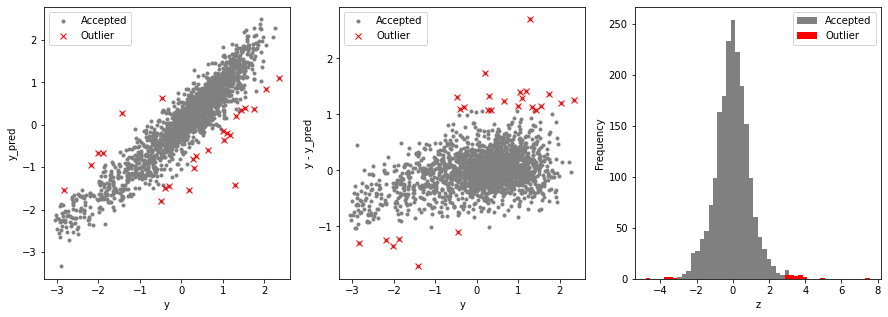

In [319]:
# Using a Ridge model to find and remove outliers
from sklearn.linear_model import Ridge
X, X_train, X_valid, y_train, y_valid = get_training_data()

outliers = find_outliers(Ridge(), X_train, y_train)

X_outliers = X_train.loc[outliers]
y_outliers = y_train.loc[outliers]
X_t = X_train.drop(outliers)
y_t = y_train.drop(outliers)

In [320]:
def get_trainning_data_omitoutliers():
    y1 = y_t.copy()
    X1 = X_t.copy()
    return X1, y1

# Modeling and parameters tuning

In [321]:
# Apply grid search and train model
from sklearn.preprocessing import StandardScaler
def train_model(model, param_grid = [], X = [], y = [], 
                splits = 5, repeats = 5):

    # get unmodified training data, unless data to use already specified
    if len(y) == 0:
        X, y = get_trainning_data_omitoutliers()
    
    # create cross-validation method
    rkfold = RepeatedKFold(n_splits = splits, n_repeats = repeats)
    
    # perform a grid search if param_grid given
    if len(param_grid) > 0:
        # setup grid search parameters
        gsearch = GridSearchCV(model, param_grid, cv = rkfold,
                               scoring = "neg_mean_squared_error",
                               verbose = 1, return_train_score = True)

        # search the grid
        gsearch.fit(X, y)

        # extract best model from the grid
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_

        # get cv-scores for best model
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx, 'mean_test_score'])
        cv_std = grid_results.loc[best_idx, 'std_test_score']

    # no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean, 'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(X)
    
    # print stats on model performance         
    print('----------------------')
    print(model)
    print('----------------------')
    print('score =', model.score(X,y))
    print('rmse =', rmse(y, y_pred))
    print('mse =', mse(y, y_pred))
    print('cross_val: mean =', cv_mean, ', std =', cv_std)
    
    # residual plots
    y_pred = pd.Series(y_pred, index = y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid) / std_resid    
    n_outliers = sum(abs(z) > 3)
    
    plt.figure(figsize = (17, 5))
    ax_131 = plt.subplot(1, 3, 1)
    plt.plot(y,y_pred, '.', color = "gray")
    plt.xlabel('y')
    plt.ylabel('y_pred');
    plt.title('corr = {:.3f}'.format(np.corrcoef(y, y_pred)[0][1]))
    ax_132 = plt.subplot(1, 3, 2)
    plt.plot(y, y - y_pred, '.', color = "gray")
    plt.xlabel('y')
    plt.ylabel('y - y_pred');
    plt.title('std resid = {:.3f}'.format(std_resid))
    
    ax_133 = plt.subplot(1, 3, 3)
    z.plot.hist(bins = 50, ax = ax_133, color = "gray")
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))
    plt.show()
    return model, cv_score, grid_results

In [322]:
# places to store optimal models and scores
opt_models = dict()
score_models = pd.DataFrame(columns = ['mean','std'])

# no. k-fold splits
splits = 5
# no. k-fold iterations
repeats = 5

Fitting 25 folds for each of 23 candidates, totalling 575 fits
----------------------
Ridge(alpha=0.25)
----------------------
score = 0.8916031660666921
rmse = 0.32278283465598046
mse = 0.1041887583485498
cross_val: mean = 0.10767752619627535 , std = 0.006565027967170288


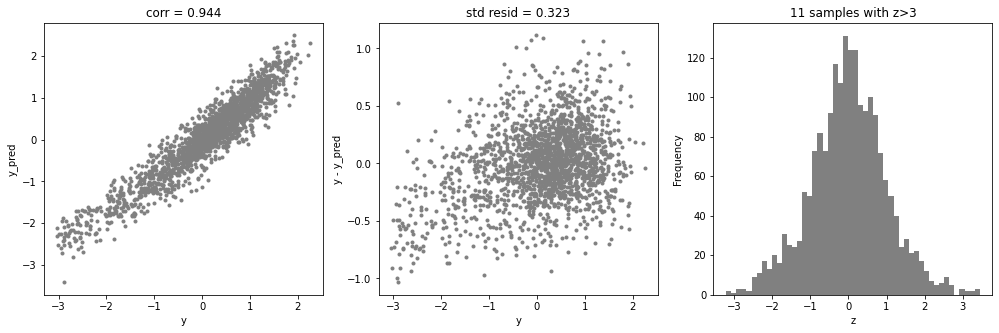

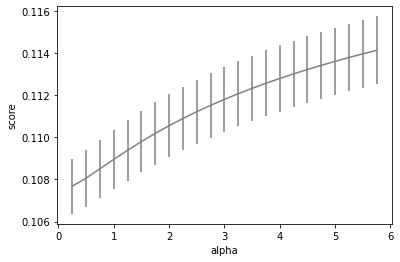

In [323]:
# Ridge regression
model = 'Ridge'

opt_models[model] = Ridge()
alph_range = np.arange(0.25, 6, 0.25)
param_grid = {'alpha': alph_range}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid = param_grid, 
                                              splits = splits, repeats = repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score']) / np.sqrt(splits * repeats), color = "gray")
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

Fitting 25 folds for each of 23 candidates, totalling 575 fits
----------------------
Lasso(alpha=0.0001)
----------------------
score = 0.891691667398783
rmse = 0.322651038629015
mse = 0.10410369272838219
cross_val: mean = 0.10820951468148021 , std = 0.006955958100326342


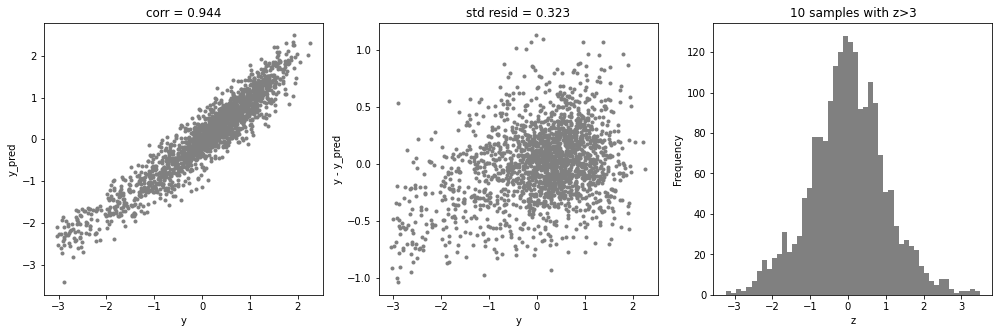

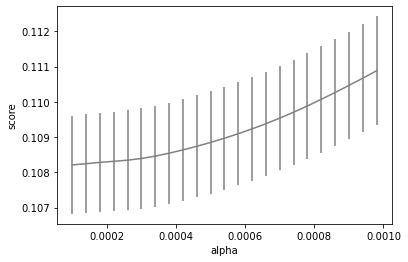

In [324]:
# Lasso regression
model = 'Lasso'

opt_models[model] = Lasso()
alph_range = np.arange(1e-4, 1e-3, 4e-5)
param_grid = {'alpha': alph_range}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid = param_grid, 
                                              splits = splits, repeats = repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(alph_range, abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score']) / np.sqrt(splits * repeats), color = "gray")
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
----------------------
ElasticNet(alpha=0.0001, l1_ratio=0.9, max_iter=100000)
----------------------
score = 0.8916892978084301
rmse = 0.32265456812018367
mse = 0.10410597032882227
cross_val: mean = 0.10835129324312776 , std = 0.0038176059567968644


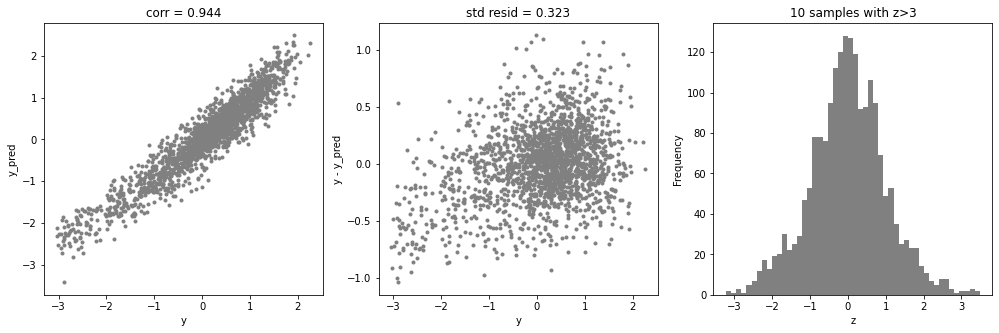

In [325]:
# ElasticNet
model ='ElasticNet'
opt_models[model] = ElasticNet()

param_grid = {'alpha': np.arange(1e-4, 1e-3, 1e-4),
              'l1_ratio': np.arange(0.1, 1.0, 0.1),
              'max_iter': [100000]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid = param_grid, 
                                              splits = splits, repeats = 1)

cv_score.name = model
score_models = score_models.append(cv_score)


Fitting 25 folds for each of 9 candidates, totalling 225 fits
----------------------
LinearSVR(C=0.2)
----------------------
score = 0.8762536991125812
rmse = 0.344880186948201
mse = 0.11894234334942595
cross_val: mean = 0.11793541239020466 , std = 0.010475295425745481


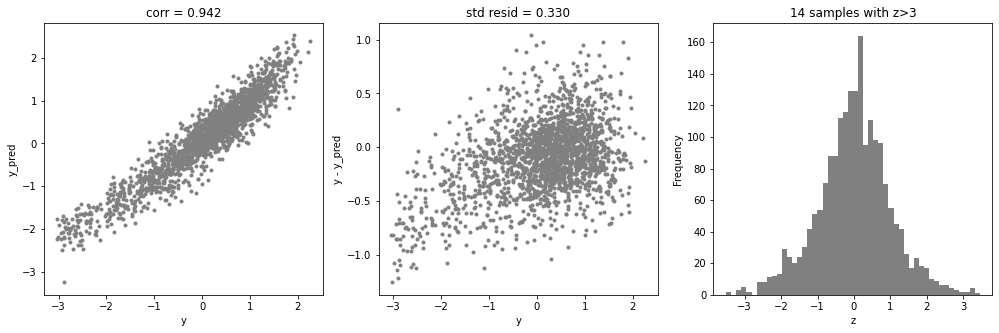

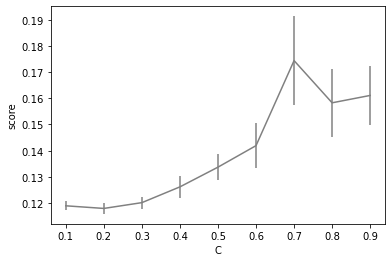

In [326]:
# SVM linear regression
model = 'LinearSVR'
opt_models[model] = LinearSVR()

crange = np.arange(0.1, 1.0, 0.1)
param_grid = {'C':crange,
             'max_iter': [1000]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid = param_grid, 
                                              splits = splits, repeats = repeats)
cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(crange, abs(grid_results['mean_test_score']), 
             abs(grid_results['std_test_score']) / np.sqrt(splits * repeats), color = "gray")
plt.xlabel('C')
plt.ylabel('score')
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------------------
KNeighborsRegressor(n_neighbors=7)
----------------------
score = 0.8639957632293968
rmse = 0.361558312954937
mse = 0.1307244136668201
cross_val: mean = 0.1842687257326991 , std = 0.01172175291859212


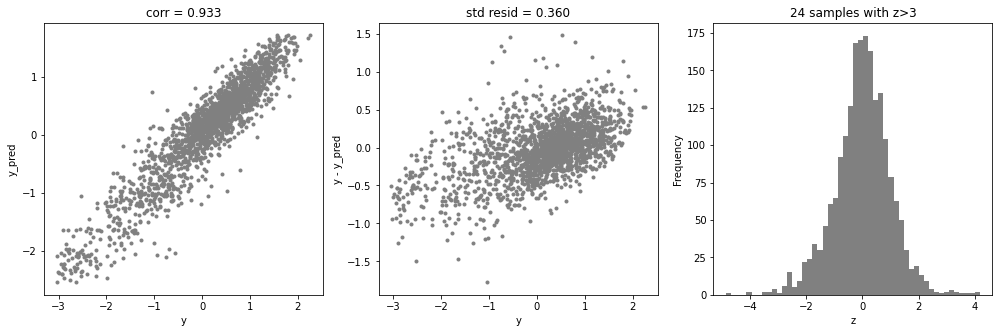

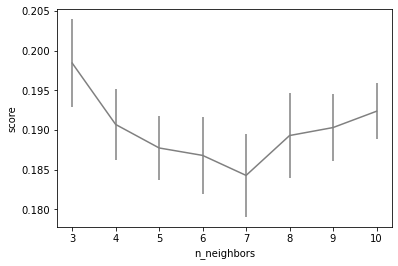

In [327]:
# KNN
model = 'KNeighbors'
opt_models[model] = KNeighborsRegressor()

param_grid = {'n_neighbors':np.arange(3, 11, 1)}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid = param_grid, 
                                              splits = splits, repeats = 1)

cv_score.name = model
score_models = score_models.append(cv_score)

plt.figure()
plt.errorbar(np.arange(3, 11, 1), abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score']) / np.sqrt(splits * 1), color = "gray")
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------------------
GradientBoostingRegressor(min_samples_split=5, n_estimators=250)
----------------------
score = 0.9640460590150741
rmse = 0.1858982849495528
mse = 0.03455817234718516
cross_val: mean = 0.09657935035760609 , std = 0.005892293911817664


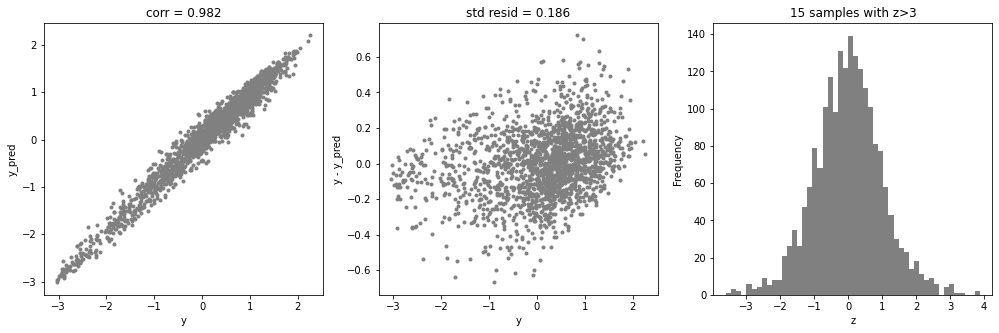

In [328]:
model = 'GradientBoosting'
opt_models[model] = GradientBoostingRegressor()

param_grid = {'n_estimators':[150, 250, 350],
              'max_depth':[1, 2, 3],
              'min_samples_split':[5, 6, 7]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid = param_grid, 
                                              splits = splits, repeats = 1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
----------------------
score = 0.957758937702519
rmse = 0.2014974471346344
mse = 0.040601221201774874
cross_val: mean = 0.1001268024209659 , std = 0.005121324209815494


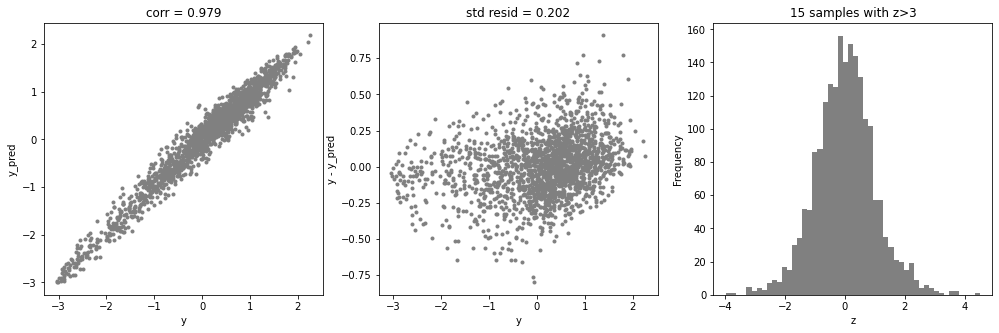

In [329]:
model = 'XGB'
opt_models[model] = XGBRegressor()

param_grid = {'n_estimators':[100, 200, 300, 400, 500],
              'max_depth':[1, 2, 3],
             }

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid = param_grid, 
                                              splits = splits, repeats = 1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------------------
LGBMRegressor(max_depth=2, n_estimators=500)
----------------------
score = 0.9516355785884028
rmse = 0.21560812895945208
mse = 0.04648686527339576
cross_val: mean = 0.09510546822350342 , std = 0.007223115725332767


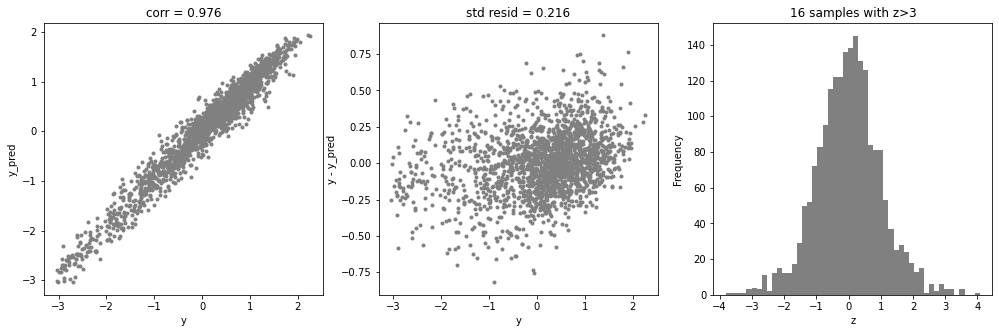

In [330]:
model = 'lgb'
opt_models[model] = lgb.LGBMRegressor()

param_grid = {'n_estimators':[100, 200, 300, 400, 500],
              'max_depth':[1, 2, 3],
             }

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid = param_grid, 
                                              splits = splits, repeats = 1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------------------
AdaBoostRegressor(n_estimators=400)
----------------------
score = 0.8903906656628642
rmse = 0.3245830991453047
mse = 0.1053541882507707
cross_val: mean = 0.1276262855075579 , std = 0.011989281856548073


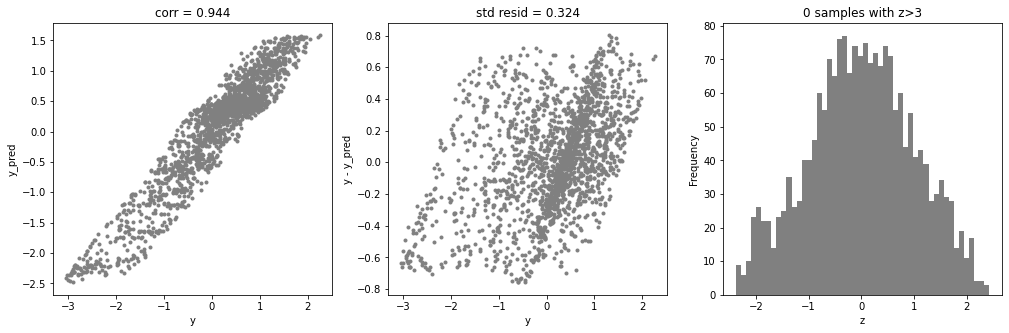

In [331]:
model = 'AdaBoost'
opt_models[model] = AdaBoostRegressor()

param_grid = {'n_estimators':[100, 200, 300, 400, 500],
             }

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid = param_grid, 
                                              splits = splits, repeats = 1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------------------
RandomForestRegressor(max_features=16, min_samples_split=4)
----------------------
score = 0.9824379543575595
rmse = 0.12992408987247422
mse = 0.016880269129190776
cross_val: mean = 0.10316936828022642 , std = 0.003779168787615754


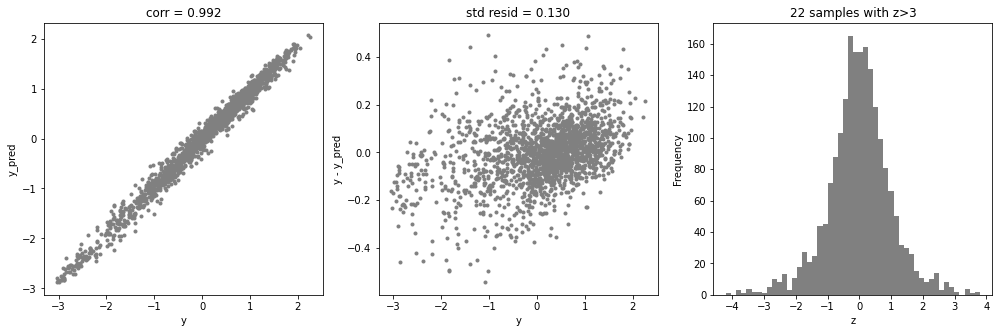

In [332]:
model = 'RandomForest'
opt_models[model] = RandomForestRegressor()

param_grid = {'n_estimators': [100],
              'max_features': [16],
              'min_samples_split':[2, 4, 6]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits = 5, repeats = 1)

cv_score.name = model
score_models = score_models.append(cv_score)

In [333]:
def model_predict(test_data, test_y = [], stack = False):
    i = 0
    model_mse = []
    y_predict_total = np.zeros((test_data.shape[0],))
    for model in opt_models.keys():
        if model != "LinearSVR" and model != "KNeighbors":
            y_predict = opt_models[model].predict(test_data)
            y_predict_total += y_predict
            i += 1
        if len(test_y) > 0:
            print("{}_mse:".format(model), mean_squared_error(y_predict, test_y))
            model_mse.append([i, mean_squared_error(y_predict, test_y)])
            #print(model_mse)
    y_predict_mean = np.round(y_predict_total / i, 3)
    if len(test_y) > 0:
        print("mean_mse:", mean_squared_error(y_predict_mean, test_y))
    else:
        y_predict_mean = pd.Series(y_predict_mean)
        return y_predict_mean
    return model_mse

In [334]:
model_mse = model_predict(X_valid, y_valid)

Ridge_mse: 0.12783460248984113
Lasso_mse: 0.12764909852721765
ElasticNet_mse: 0.1276644154785022
LinearSVR_mse: 0.1276644154785022
KNeighbors_mse: 0.1276644154785022
GradientBoosting_mse: 0.11682937279568527
XGB_mse: 0.1257521799534449
lgb_mse: 0.11827458816474597
AdaBoost_mse: 0.1562942481006389
RandomForest_mse: 0.12563243953688671
mean_mse: 0.11358328406466513


In [335]:
print(model_mse)

[[1, 0.12783460248984113], [2, 0.12764909852721765], [3, 0.1276644154785022], [3, 0.1276644154785022], [3, 0.1276644154785022], [4, 0.11682937279568527], [5, 0.1257521799534449], [6, 0.11827458816474597], [7, 0.1562942481006389], [8, 0.12563243953688671]]


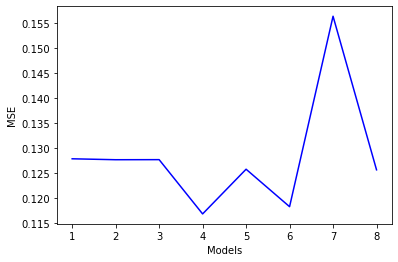

In [336]:
plt.figure()
x_axis = [model_mse[i][0] for i in range(len(model_mse))]
y_axis = [model_mse[i][1] for i in range(len(model_mse))]
plt.plot(x_axis, y_axis, color = "blue")
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()